# Exploratory Data Analysis on IPL 2024 Dataset


In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

In [167]:
data = pd.read_csv('ipl_2024_deliveries.csv')

In [168]:
data.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,0,1,1,0,0,0,NaN,NaN,NaN
1,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,1,0,0,0,0,0,NaN,NaN,NaN
2,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN
3,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN
4,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN


In [152]:
data.shape


(17053, 20)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17053 non-null  int64  
 1   season            17053 non-null  int64  
 2   match_no          17053 non-null  int64  
 3   date              17053 non-null  object 
 4   venue             17053 non-null  object 
 5   batting_team      17053 non-null  object 
 6   bowling_team      17053 non-null  object 
 7   innings           17053 non-null  int64  
 8   over              17053 non-null  float64
 9   striker           17053 non-null  object 
 10  bowler            17053 non-null  object 
 11  runs_of_bat       17053 non-null  int64  
 12  extras            17053 non-null  int64  
 13  wide              17053 non-null  int64  
 14  legbyes           17053 non-null  int64  
 15  byes              17053 non-null  int64  
 16  noballs           17053 non-null  int64 

In [154]:
data.isnull().sum()

match_id                0
season                  0
match_no                0
date                    0
venue                   0
batting_team            0
bowling_team            0
innings                 0
over                    0
striker                 0
bowler                  0
runs_of_bat             0
extras                  0
wide                    0
legbyes                 0
byes                    0
noballs                 0
wicket_type         16170
player_dismissed    16170
fielder             16344
dtype: int64

In [155]:
data.describe()

,match_id,season,match_no,innings,over,runs_of_bat,extras,wide,legbyes,byes,noballs
count,17053.000000,17053.0,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,202435.902656,2024.0,35.902656,1.480033,9.570474,1.445904,0.074122,0.039817,0.012842,0.002463,0.004222
std,20.896995,0.0,20.896995,0.499616,5.674610,1.800340,0.357906,0.195535,0.112597,0.049568,0.064843
min,202401.000000,2024.0,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202418.000000,2024.0,18.000000,1.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202436.000000,2024.0,36.000000,1.000000,9.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202453.000000,2024.0,53.000000,2.000000,14.400000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202474.000000,2024.0,74.000000,2.000000,19.600000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
data.duplicated().sum()

0

In [157]:
data.dtypes

match_id              int64
season                int64
match_no              int64
date                 object
venue                object
batting_team         object
bowling_team         object
innings               int64
over                float64
striker              object
bowler               object
runs_of_bat           int64
extras                int64
wide                  int64
legbyes               int64
byes                  int64
noballs               int64
wicket_type          object
player_dismissed     object
fielder              object
dtype: object

In [169]:
data[data.duplicated(keep=False)].head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder


In [170]:
data.drop_duplicates(inplace=True)

In [171]:
data.shape

(17053, 20)

In [172]:
data.duplicated().sum()

0

In [173]:
data.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,0,1,1,0,0,0,NaN,NaN,NaN
1,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,Chahar,1,0,0,0,0,0,NaN,NaN,NaN
2,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN
3,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN
4,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,Chahar,0,0,0,0,0,0,NaN,NaN,NaN


In [174]:
data['total_runs'] = data['runs_of_bat'] + data['extras']

In [175]:
data.shape

(17053, 21)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17053 non-null  int64  
 1   season            17053 non-null  int64  
 2   match_no          17053 non-null  int64  
 3   date              17053 non-null  object 
 4   venue             17053 non-null  object 
 5   batting_team      17053 non-null  object 
 6   bowling_team      17053 non-null  object 
 7   innings           17053 non-null  int64  
 8   over              17053 non-null  float64
 9   striker           17053 non-null  object 
 10  bowler            17053 non-null  object 
 11  runs_of_bat       17053 non-null  int64  
 12  extras            17053 non-null  int64  
 13  wide              17053 non-null  int64  
 14  legbyes           17053 non-null  int64  
 15  byes              17053 non-null  int64  
 16  noballs           17053 non-null  int64 

# EDA

In [177]:
data.head(5)

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,...,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder,total_runs
0,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,...,0,1,1,0,0,0,NaN,NaN,NaN,1
1,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,...,1,0,0,0,0,0,NaN,NaN,NaN,1
2,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,...,0,0,0,0,0,0,NaN,NaN,NaN,0
3,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,...,0,0,0,0,0,0,NaN,NaN,NaN,0
4,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,...,0,0,0,0,0,0,NaN,NaN,NaN,0


In [178]:
# Count unique values in categorical columns
print(data['batting_team'].value_counts())
print(data['bowling_team'].value_counts())
print(data['venue'].value_counts())
print(data['match_id'].value_counts())
print(data['striker'].value_counts())

batting_team
SRH     1914
RR      1824
RCB     1811
LSG     1719
CSK     1717
PBKS    1687
MI      1685
DC      1637
KKR     1588
GT      1471
Name: count, dtype: int64
bowling_team
SRH     1882
RR      1860
RCB     1795
PBKS    1734
DC      1727
CSK     1722
MI      1699
KKR     1649
LSG     1637
GT      1348
Name: count, dtype: int64
venue
MA Chidambaram Stadium, Chennai                                                   2143
Narendra Modi Stadium, Ahmedabad                                                  1828
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow             1694
M.Chinnaswamy Stadium, Bengaluru                                                  1686
Wankhede Stadium, Mumbai                                                          1683
Eden Gardens, Kolkata                                                             1664
Rajiv Gandhi International Stadium, Hyderabad                                     1429
Arun Jaitley Stadium, Delhi                    

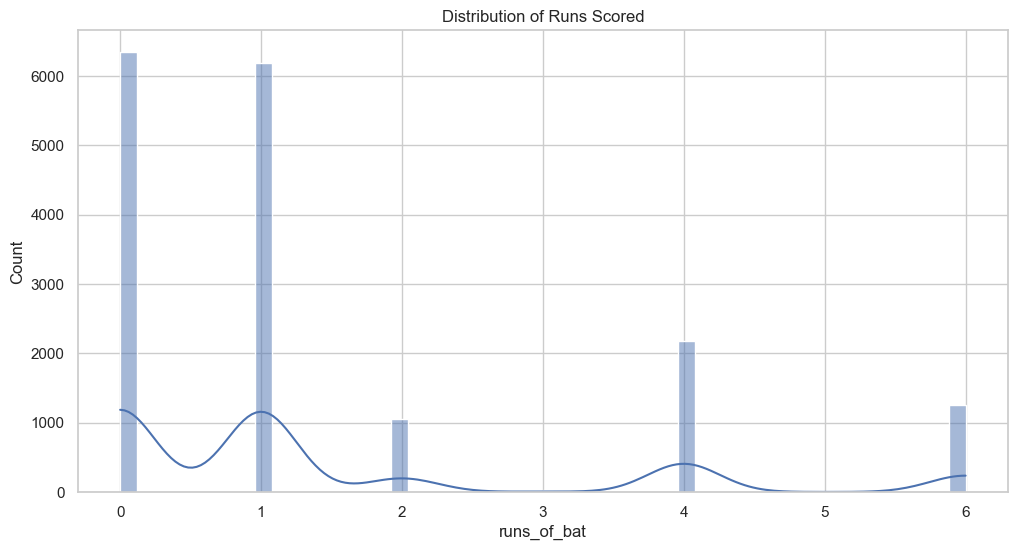

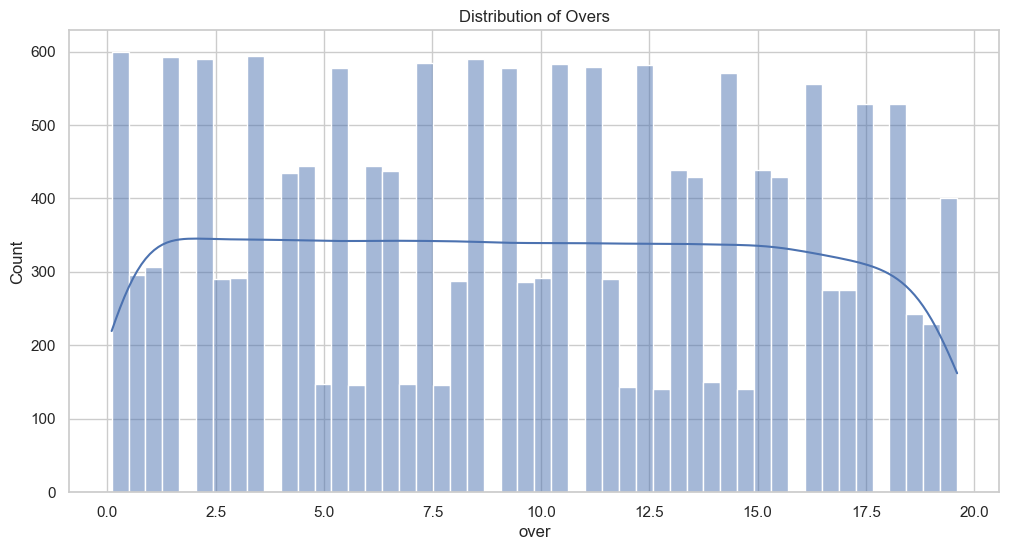

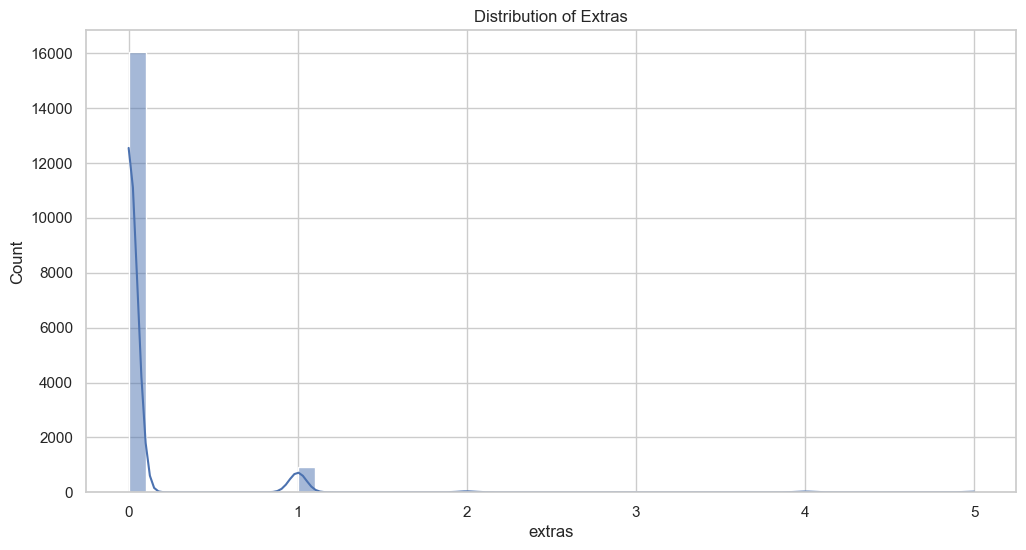

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Distribution of runs scored
plt.figure(figsize=(12, 6))
sns.histplot(data['runs_of_bat'], bins=50, kde=True)
plt.title('Distribution of Runs Scored')
plt.show()

# Distribution of overs
plt.figure(figsize=(12, 6))
sns.histplot(data['over'], bins=50, kde=True)
plt.title('Distribution of Overs')
plt.show()

# Distribution of extras
plt.figure(figsize=(12, 6))
sns.histplot(data['extras'], bins=50, kde=True)
plt.title('Distribution of Extras')
plt.show()


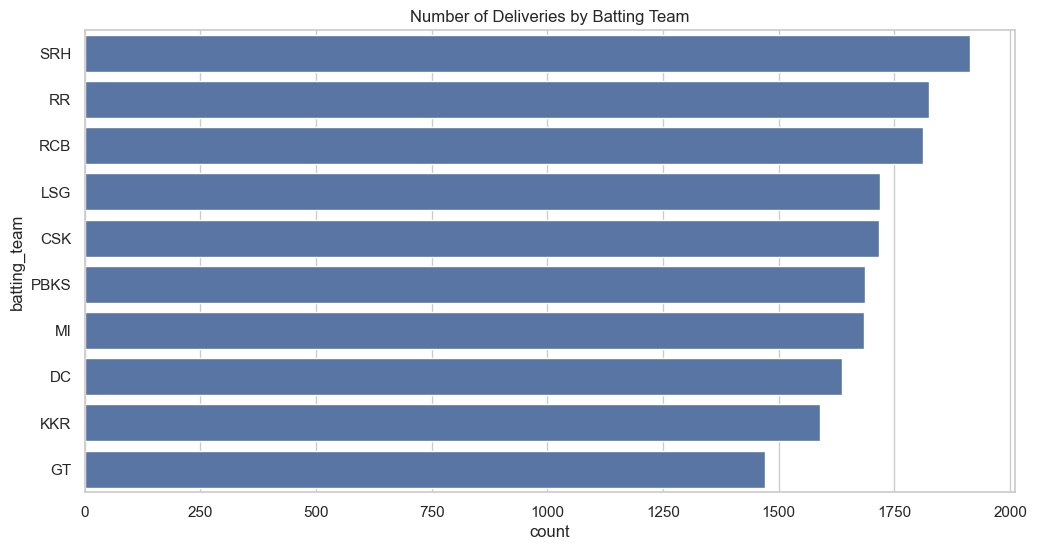

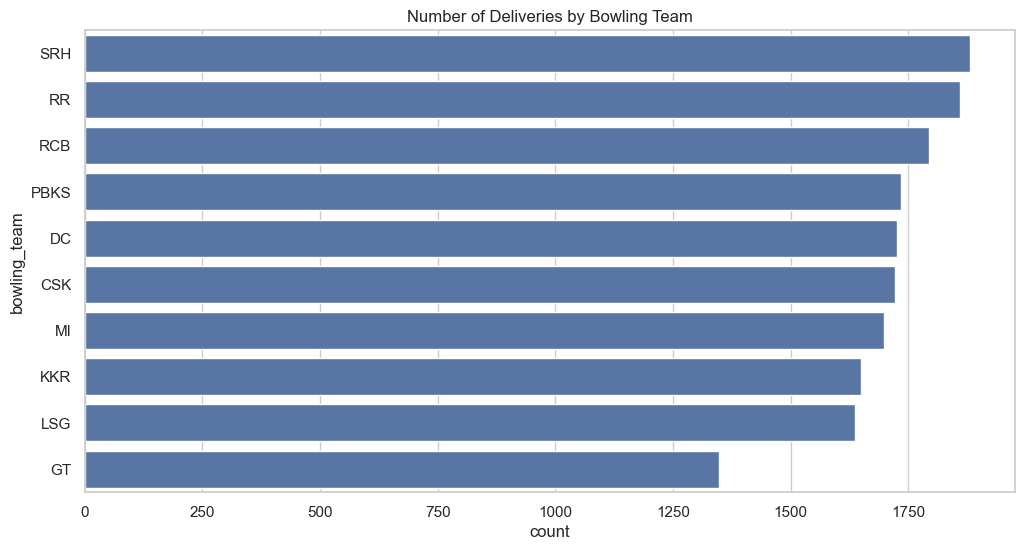

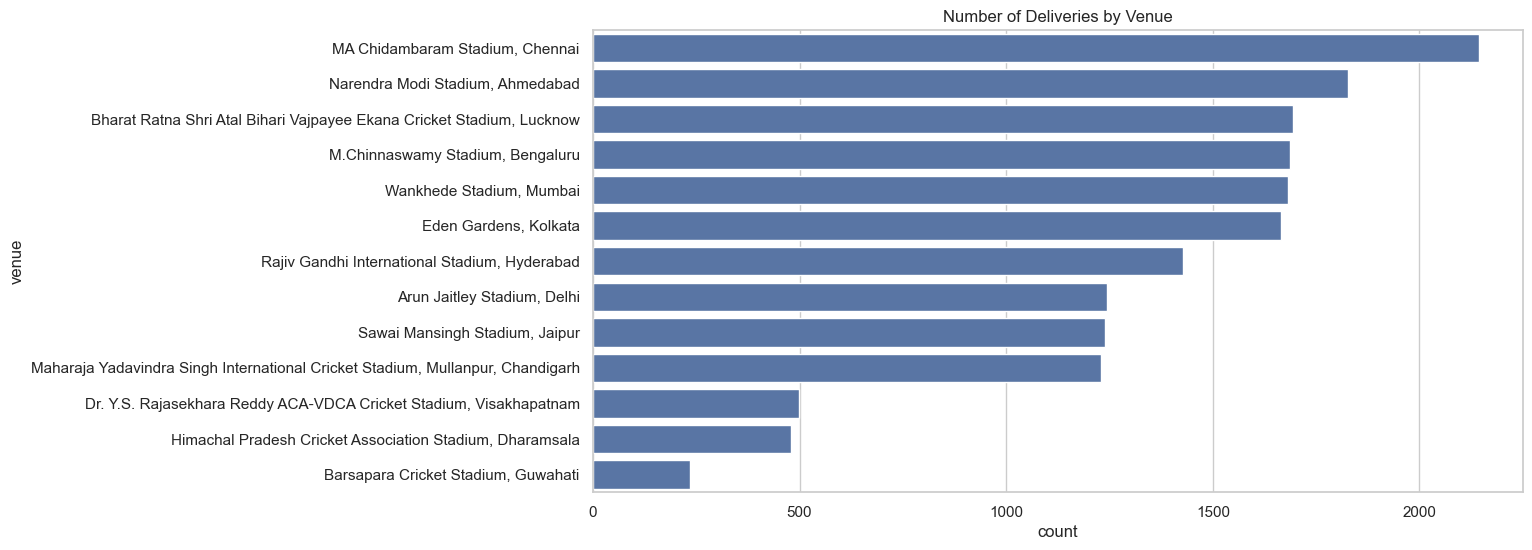

In [180]:
# Count plot for batting teams
plt.figure(figsize=(12, 6))
sns.countplot(y='batting_team', data=data, order=data['batting_team'].value_counts().index)
plt.title('Number of Deliveries by Batting Team')
plt.show()

# Count plot for bowling teams
plt.figure(figsize=(12, 6))
sns.countplot(y='bowling_team', data=data, order=data['bowling_team'].value_counts().index)
plt.title('Number of Deliveries by Bowling Team')
plt.show()

# Count plot for venues
plt.figure(figsize=(12, 6))
sns.countplot(y='venue', data=data, order=data['venue'].value_counts().index)
plt.title('Number of Deliveries by Venue')
plt.show()


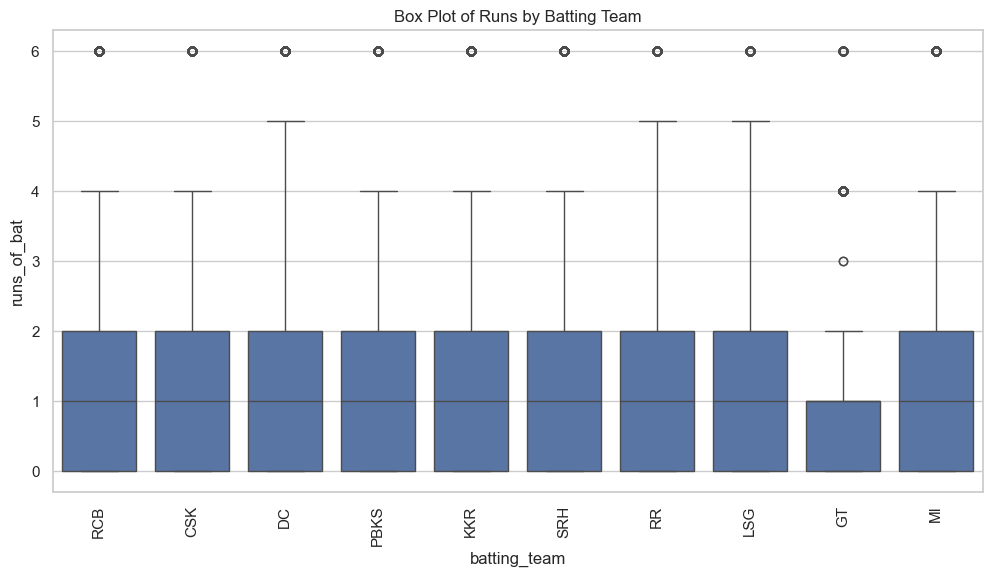

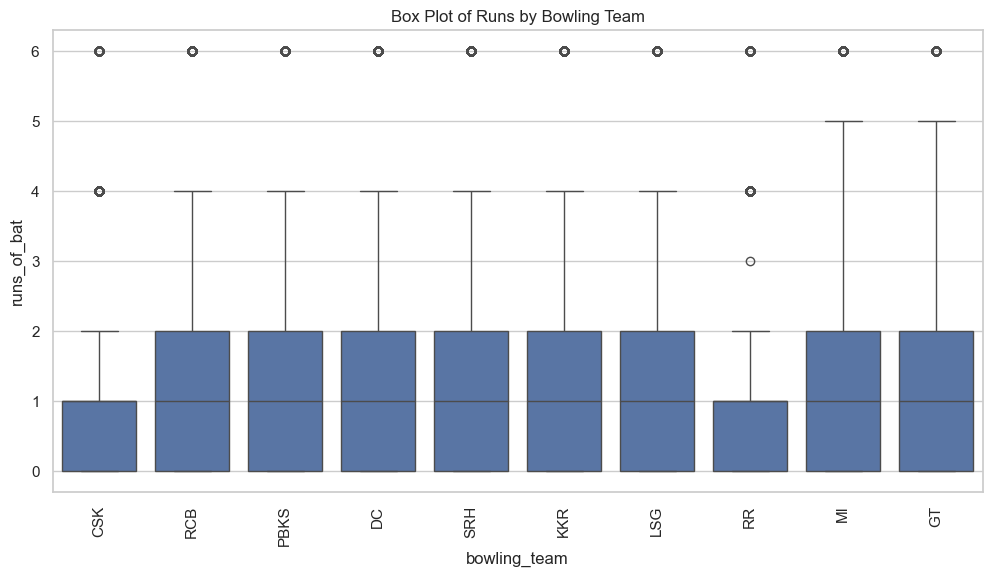

In [181]:
# Box plot for runs by batting team
plt.figure(figsize=(12, 6))
sns.boxplot(x='batting_team', y='runs_of_bat', data=data)
plt.xticks(rotation=90)
plt.title('Box Plot of Runs by Batting Team')
plt.show()

# Box plot for runs by bowling team
plt.figure(figsize=(12, 6))
sns.boxplot(x='bowling_team', y='runs_of_bat', data=data)
plt.xticks(rotation=90)
plt.title('Box Plot of Runs by Bowling Team')
plt.show()


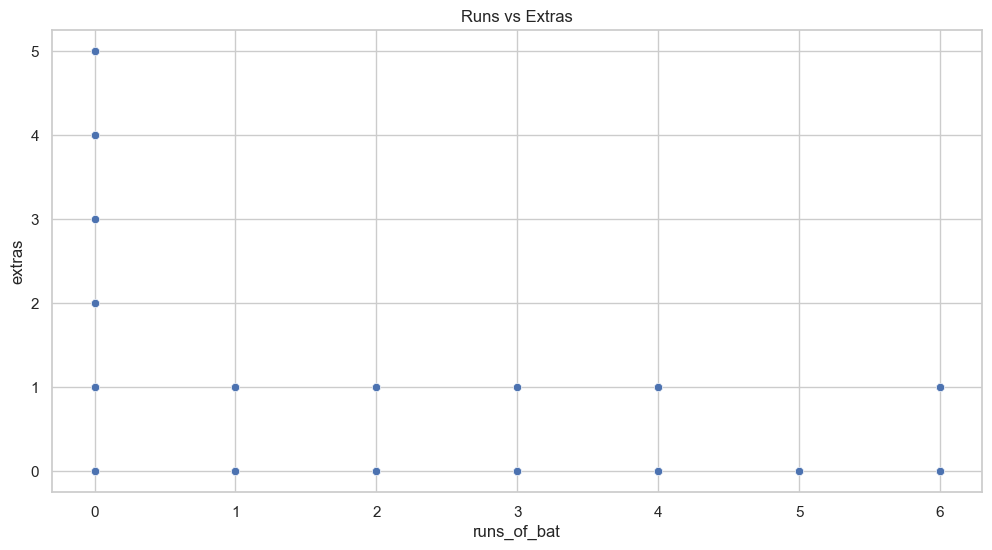

In [182]:
# Scatter plot for runs vs. extras
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runs_of_bat', y='extras', data=data)
plt.title('Runs vs Extras')
plt.show()


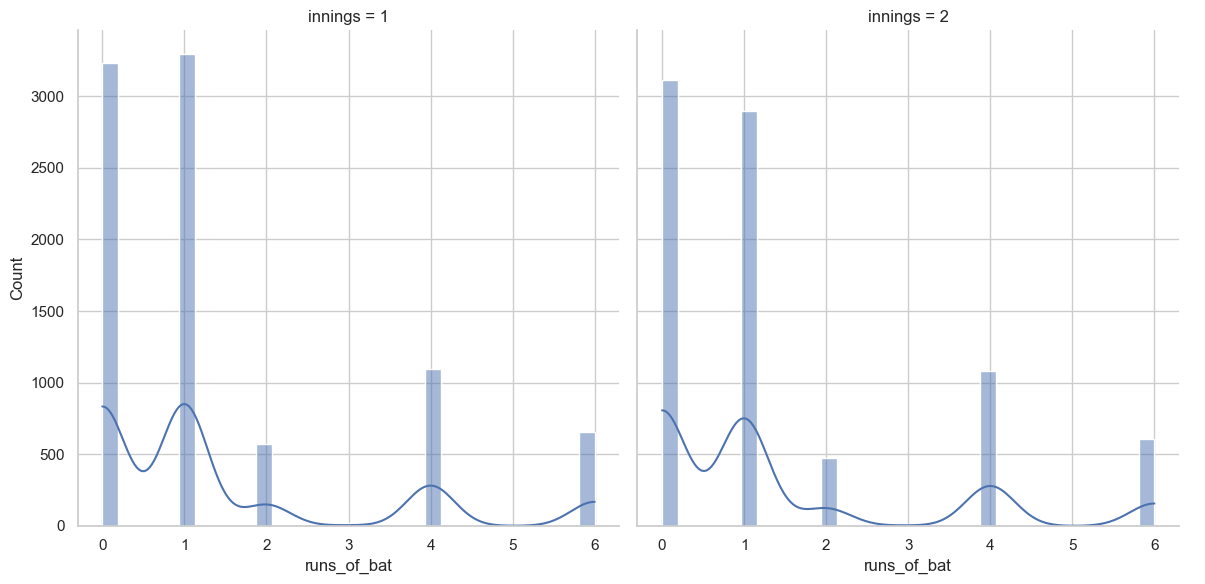

In [183]:
# Facet grid for innings and runs
g = sns.FacetGrid(data, col="innings", height=6, aspect=1)
g.map(sns.histplot, "runs_of_bat", kde=True)
g.add_legend()
plt.show()


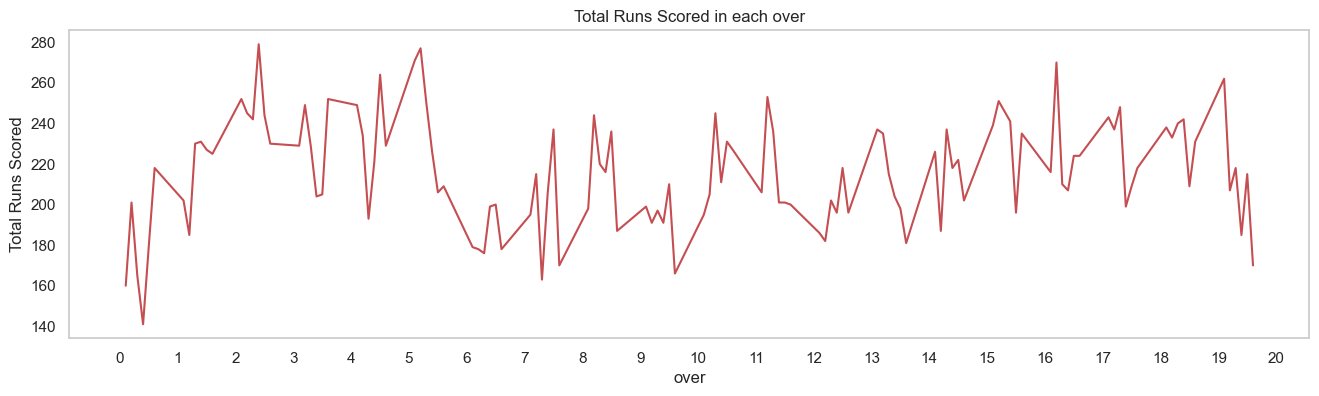

In [184]:
plt.figure(figsize=(16,4))
sns.lineplot(data.groupby('over')['total_runs'].sum(), c='r')
plt.xticks(ticks = np.arange(0,21), labels=np.arange(0,21))
plt.ylabel("Total Runs Scored")
plt.title('Total Runs Scored in each over')
plt.grid()
plt.show()

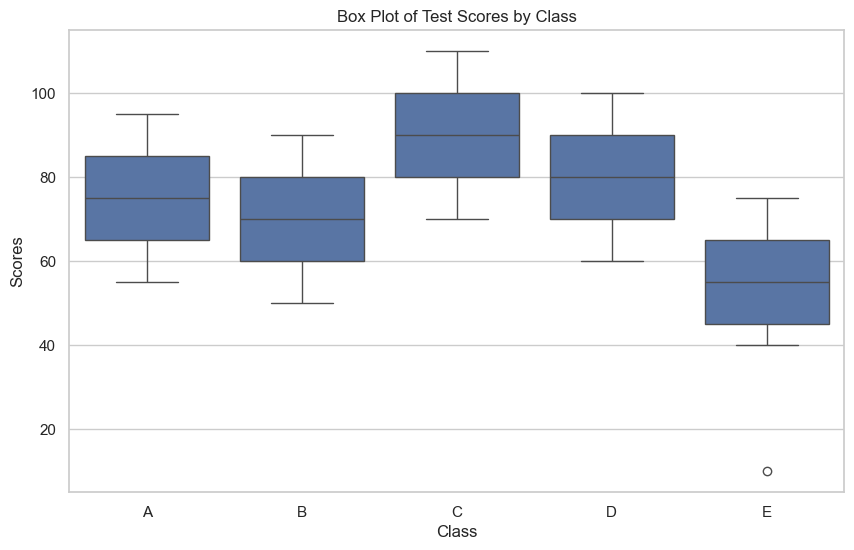

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating the dataset
d1 = {
    'Class': ['A']*9 + ['B']*9 + ['C']*9 + ['D']*9 + ['E']*9,
    'Scores': [55, 60, 65, 70, 75, 80, 85, 90, 95, 50, 55, 60, 65, 70, 75, 80, 85, 90,
               70, 75, 80, 85, 90, 95, 100, 105, 110, 60, 65, 70, 75, 80, 85, 90, 95, 100,
               40, 45, 50, 55, 60, 65, 70, 75, 10]
}
df = pd.DataFrame(d1)

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Scores', data=df)
plt.title('Box Plot of Test Scores by Class')
plt.show()


In [186]:
# Powerplay overs 3 and 5 has more runs than other overs

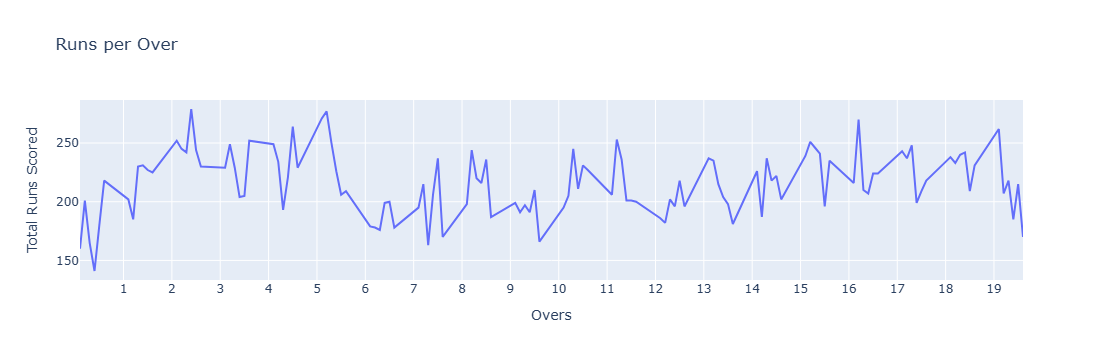

In [187]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)
grouped_data = data.groupby('over')['total_runs'].sum().reset_index()
fig = px.line(grouped_data, x='over', y='total_runs', title='Runs per Over')
fig.update_xaxes(title_text='Overs',tickvals=np.arange(0,21), ticktext=np.arange(0,21))
fig.update_yaxes(title_text='Total Runs Scored')
py.iplot(fig)

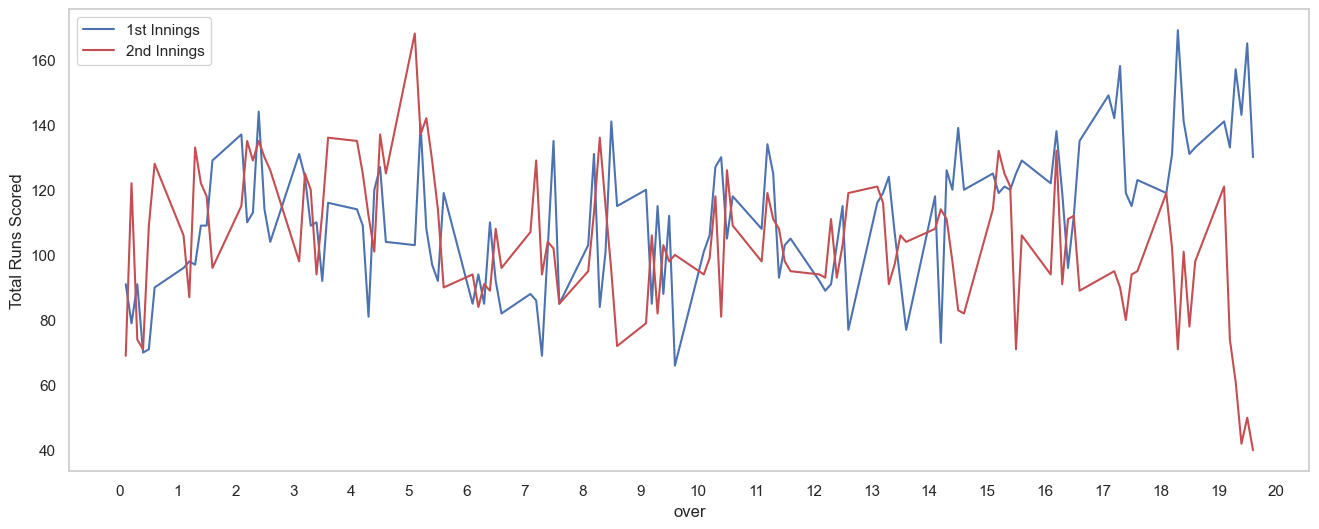

In [188]:
plt.figure(figsize=(16,6))
sns.lineplot(data[data['innings']==1].groupby('over')['total_runs'].sum(), c = 'b', label="1st Innings")
sns.lineplot(data[data['innings']==2].groupby('over')['total_runs'].sum(), c = 'r', label="2nd Innings")
plt.legend()
plt.xticks(ticks = np.arange(0,21), labels=np.arange(0,21))
plt.grid()
plt.ylabel("Total Runs Scored")
plt.show()

In [189]:
# Chasing teams scored most out of the last (6th) over of powerplay
# Batting first teams scored most out of the death overs

In [190]:
import math
data['over_'] = data['over'].map(lambda x: math.ceil(x))

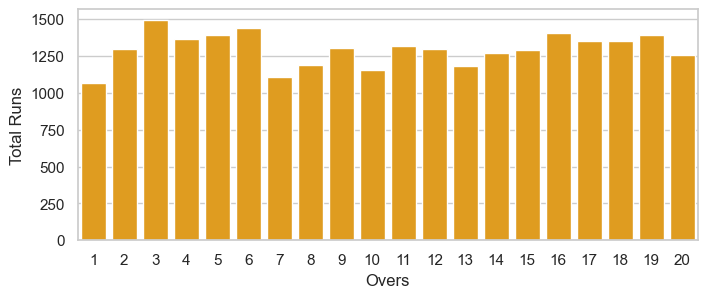

In [191]:
plt.figure(figsize=(8,3))
sns.barplot(data.groupby('over_')['total_runs'].sum(), color='orange')
plt.xlabel('Overs')
plt.ylabel('Total Runs')
plt.show()

In [192]:
avg_rpo = data.groupby(by=['match_no', 'over_'])['total_runs'].sum().reset_index().groupby('over_')['total_runs'].mean()

In [193]:
data['phase'] = data['over_'].map(lambda x : 'powerplay' if x <=6 else ('middle overs'if x <16 else 'death overs'))

In [194]:
data['phase'].value_counts()

phase
middle overs    7838
powerplay       5312
death overs     3903
Name: count, dtype: int64

In [195]:
run_rate_data = data.groupby(by=['phase', 'over_'])['total_runs'].mean().reset_index().groupby('phase')['total_runs'].mean()*6

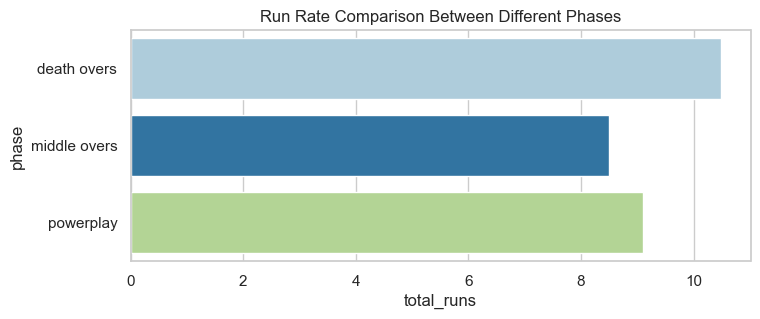

In [196]:
plt.figure(figsize=(8,3))
sns.barplot(run_rate_data, orient='h', palette='Paired')
plt.title('Run Rate Comparison Between Different Phases')
plt.show()

In [197]:
# Runs Scored: Death Overs > Powerplay > Middle Overs

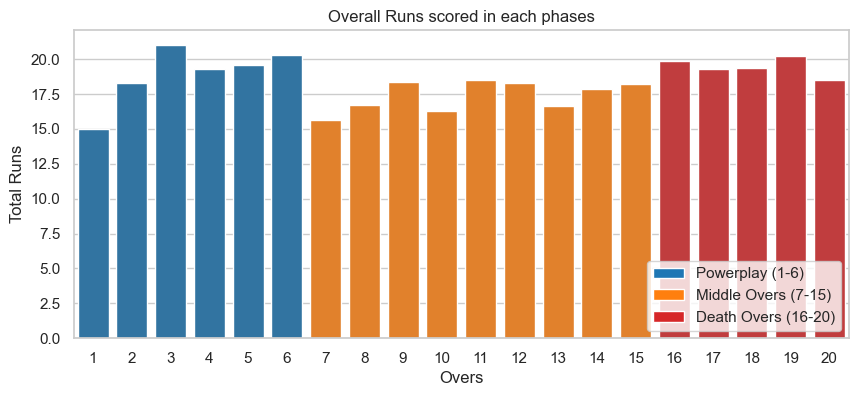

In [198]:
plt.figure(figsize=(10,4))
colors = ['tab:blue'] * 6 + ['tab:orange'] * 9 + ['tab:red'] * 5
sns.barplot(avg_rpo, palette=colors)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='tab:blue', label='Powerplay (1-6)'),
                   Patch(facecolor='tab:orange', label='Middle Overs (7-15)'),
                   Patch(facecolor='tab:red', label='Death Overs (16-20)')]
plt.legend(handles=legend_elements, loc='lower right')
plt.title("Overall Runs scored in each phases")
plt.xlabel('Overs')
plt.ylabel('Total Runs')
plt.show()

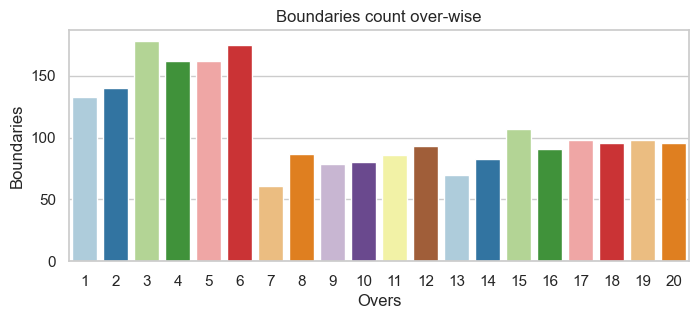

In [199]:
fours_by_over = data[data['runs_of_bat']==4].over_.value_counts().reset_index().sort_values(by='count')
plt.figure(figsize=(8,3))
sns.barplot(data=fours_by_over, x='over_', y='count', palette="Paired")
plt.xlabel('Overs')
plt.ylabel('Boundaries')
plt.title('Boundaries count over-wise')
plt.show()


In [200]:
# We could observe lot of boundaries scored in powerplay

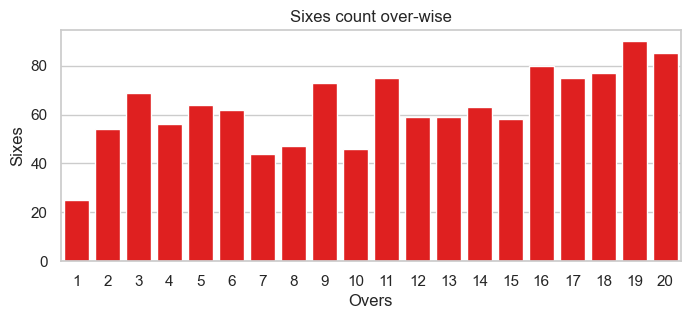

In [201]:
sixes_by_over = data[data['runs_of_bat']==6].over_.value_counts().reset_index().sort_values(by='count')
plt.figure(figsize=(8,3))
sns.barplot(data=sixes_by_over, x='over_', y='count',color="red")
plt.xlabel('Overs')
plt.ylabel('Sixes')
plt.title('Sixes count over-wise')
plt.show()


In [202]:
# Death over holds most sixes

In [203]:
jersey_colors = {
    "CSK": "#FFFF00",
    "DC": "#1746A2",
    "PBKS": "#D71920",
    "KKR": "#3F3A60",
    "MI": "#04529C",
    "RR": "#EA1A7F",
    "RCB": "#DA1111",
    "SRH": "#FF8F00",
    "GT": "#0B4D88",
    "LSG": "#00A3E0"
}

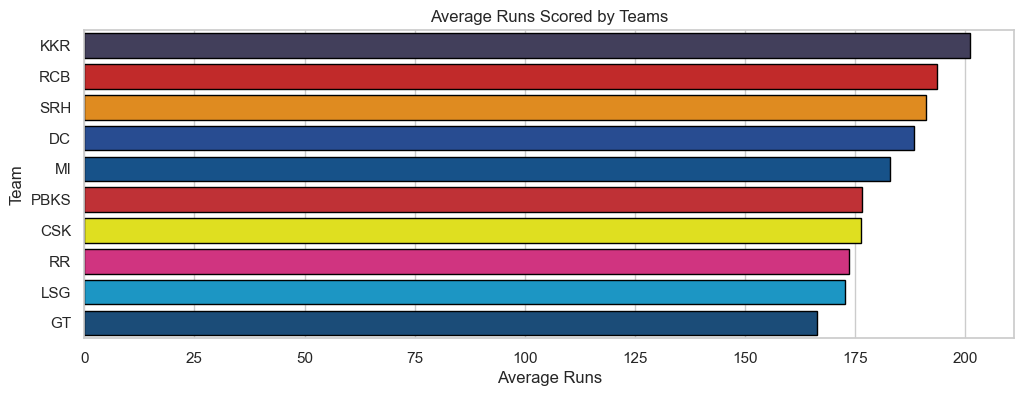

In [204]:
plt.figure(figsize=(12,4))
plt.title('Average Runs Scored by Teams')
avg_team_runs = (data.groupby('batting_team')['total_runs'].mean()*120).reset_index().sort_values(by='total_runs',ascending=False)
sns.barplot(data=avg_team_runs, x='total_runs', y='batting_team', orient='h', palette=[jersey_colors[x] for x in avg_team_runs['batting_team']],edgecolor='black')
plt.xlabel('Average Runs')
plt.ylabel('Team')
plt.show()

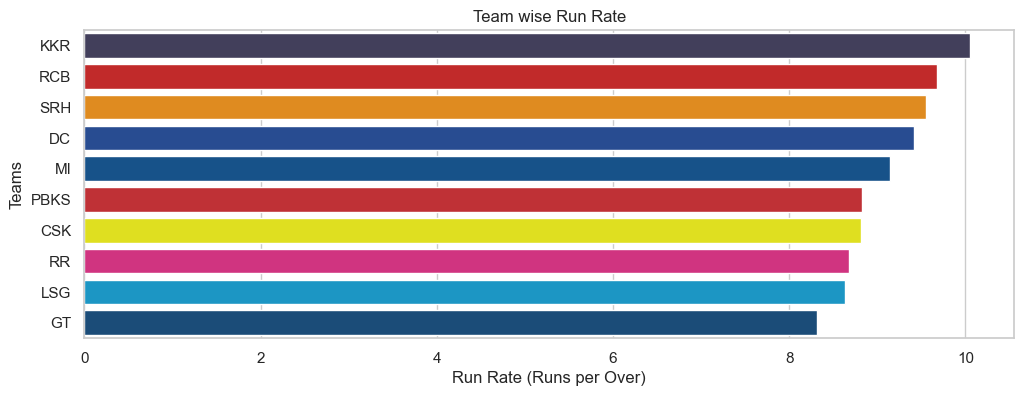

In [205]:
team_runs = data.groupby('batting_team').agg({'total_runs': 'sum', 'match_id': 'count'}).reset_index()
team_runs['run_rate'] = (team_runs['total_runs'] / team_runs['match_id']) * 6

plt.figure(figsize=(12, 4))
sns.barplot(x='run_rate', y='batting_team', data=team_runs.sort_values(by='run_rate', ascending=False), palette=[jersey_colors[x] for x in team_runs.sort_values(by='run_rate',ascending=False)['batting_team']])
plt.title('Team wise Run Rate')
plt.xlabel('Run Rate (Runs per Over)')
plt.ylabel('Teams')
plt.show()

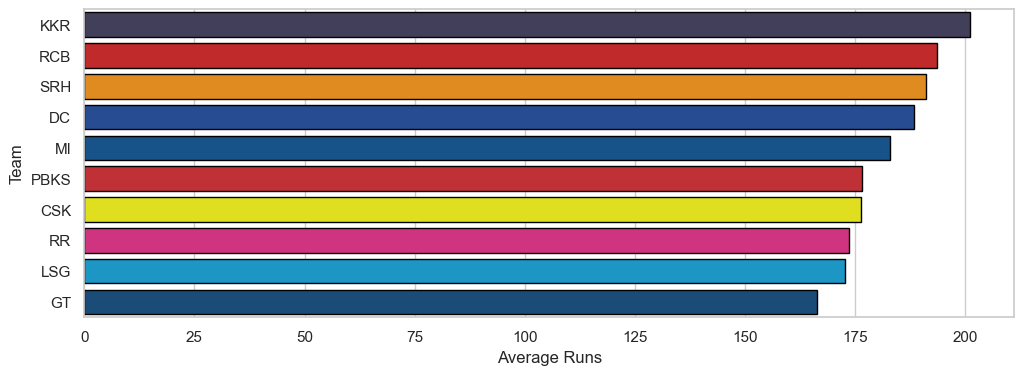

In [206]:
plt.figure(figsize=(12,4))
avg_runs = data.groupby('batting_team')['total_runs'].mean().sort_values(ascending=False)
sns.barplot(avg_runs*120, orient='h', palette=[jersey_colors[x] for x in avg_runs.index],edgecolor='black')
plt.xlabel('Average Runs')
plt.ylabel('Team')
plt.show()

In [207]:
# KKR is on top of both average runs scored as well as run rate

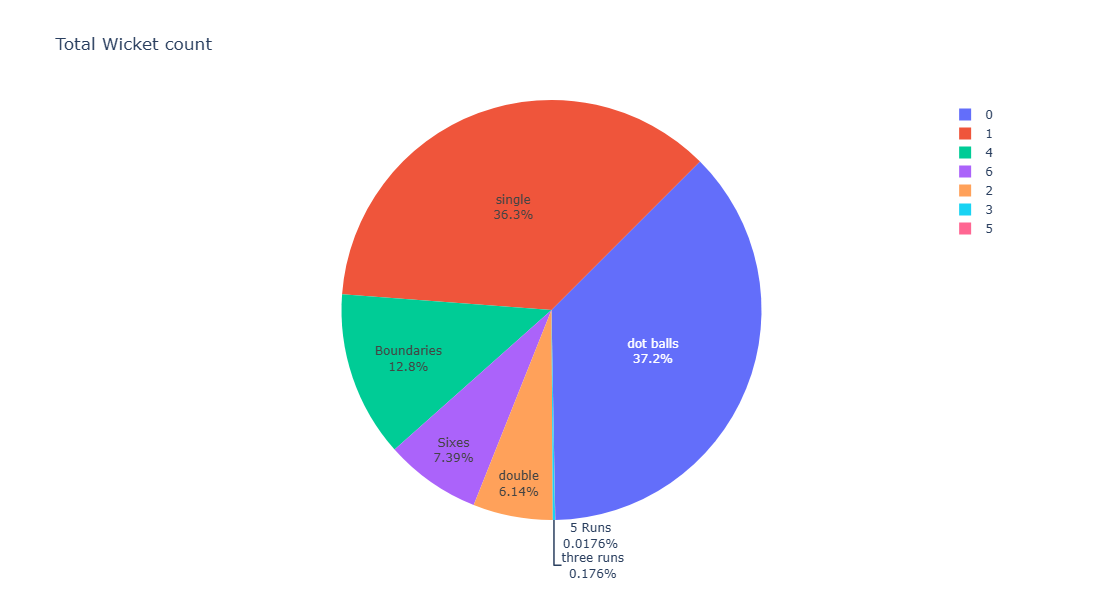

In [208]:
custom_text = ['dot balls', 'single', 'double', 'three runs', 'Boundaries', '5 Runs', 'Sixes']
runs_of_bat = data['runs_of_bat'].value_counts().sort_index()
fig = go.Figure(data=[go.Pie(
    labels=runs_of_bat.index,
    values=runs_of_bat.values,
    text=custom_text,
    rotation=45

)])
fig.update_layout(
    title_text='Total Wicket count',
    width=600,
    height=600,
)


fig.show()

In [209]:
# 37.2 % of the entire balls are dot balls and another 36.3 % are just single

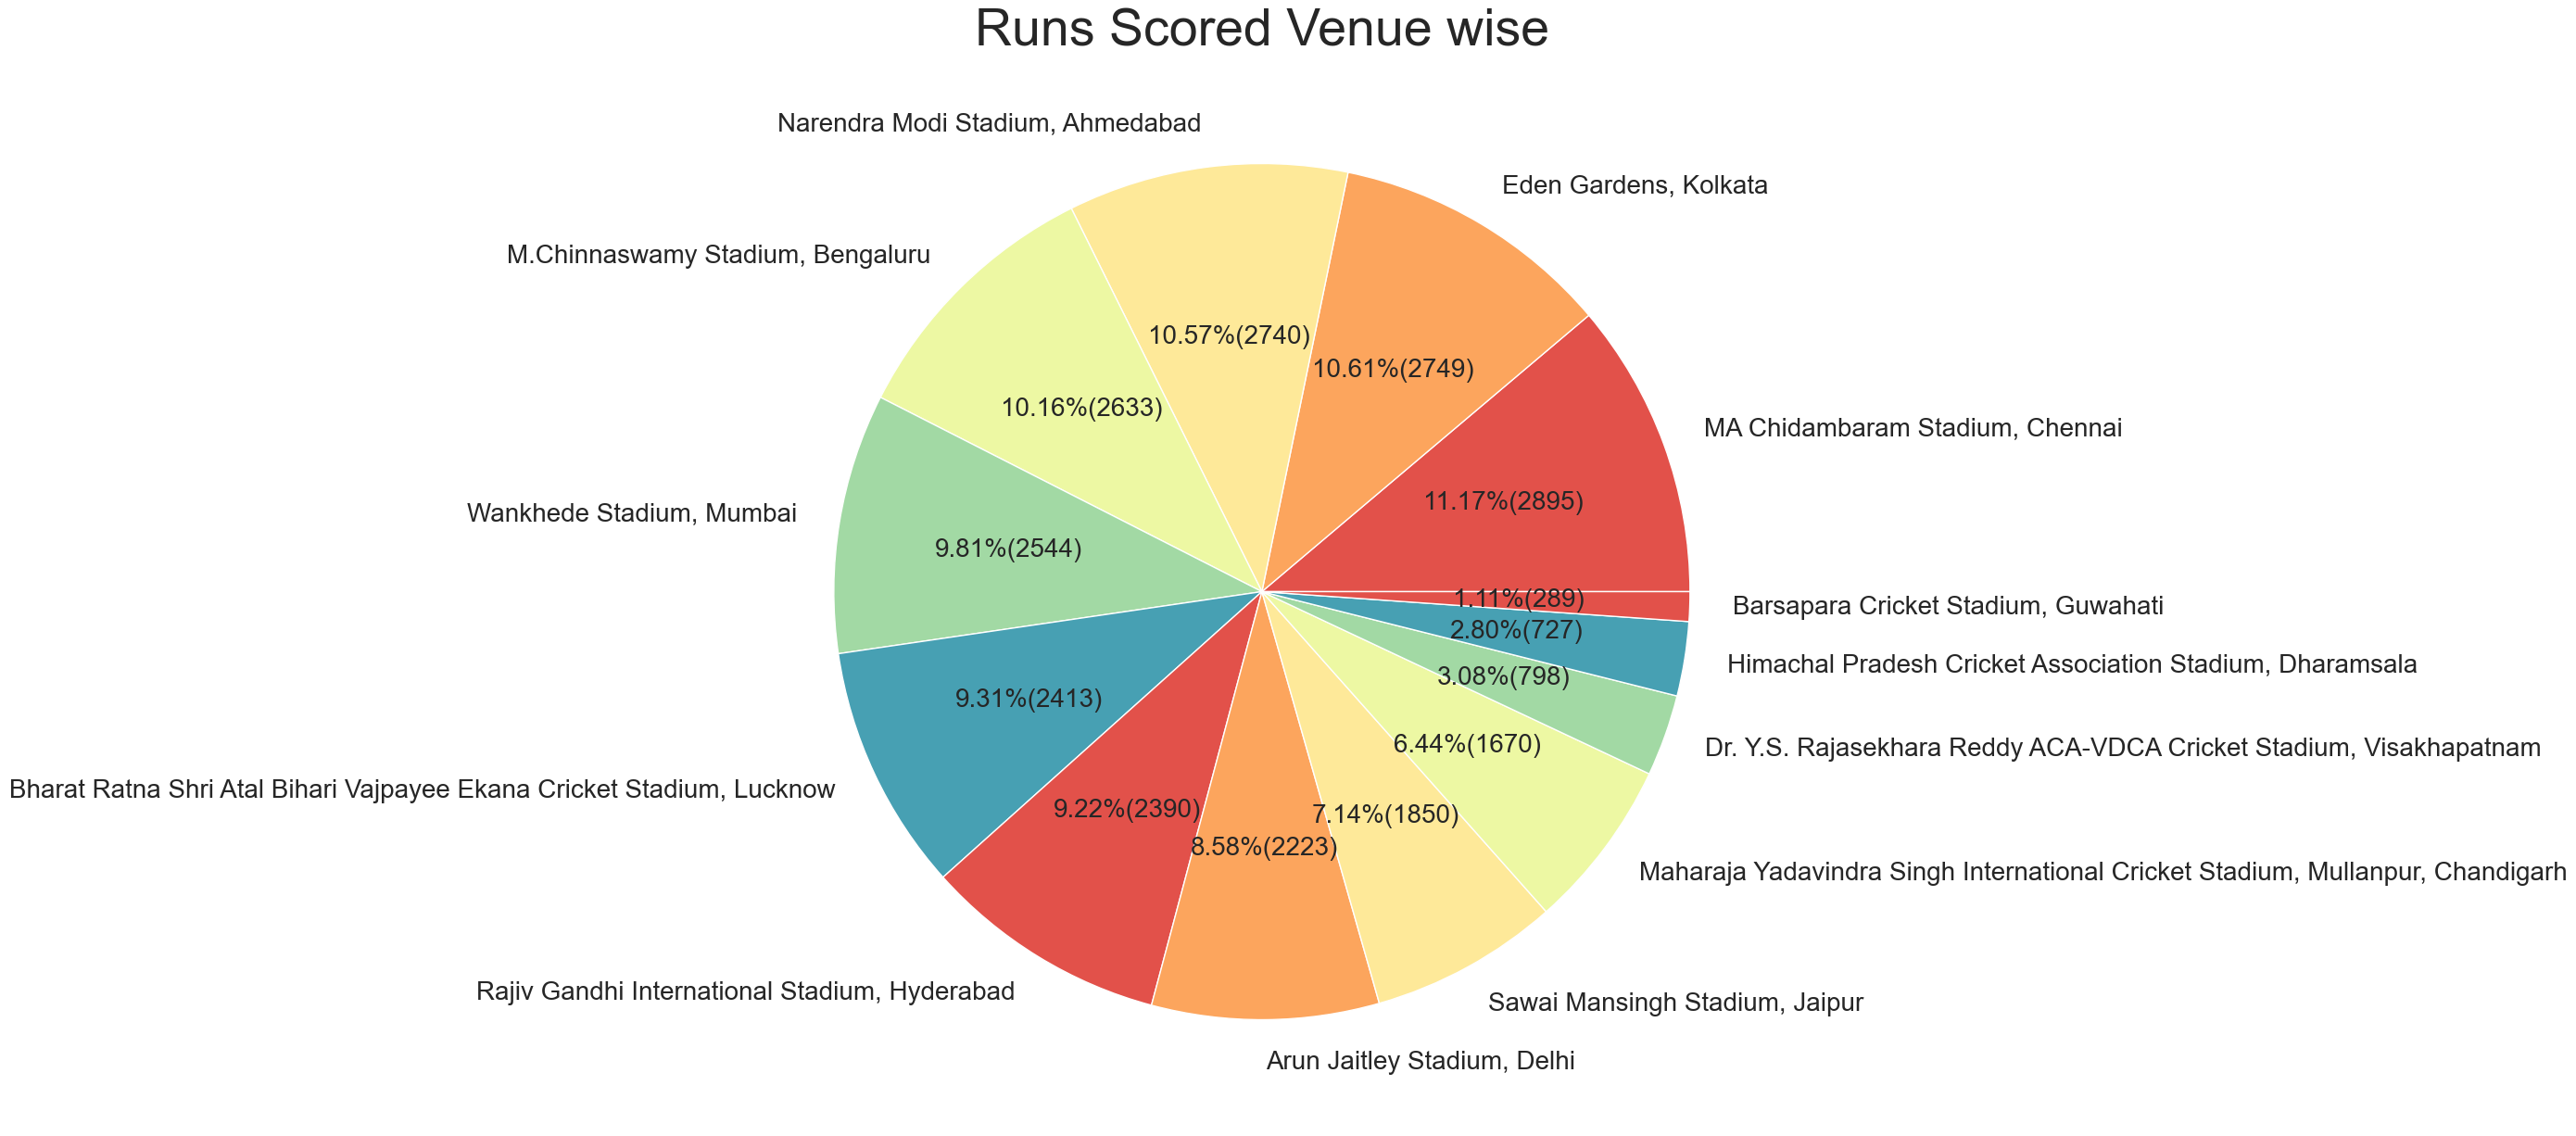

In [210]:
run_by_venue = data.groupby('venue')['total_runs'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,15))
plt.pie(run_by_venue.values, labels=run_by_venue.index, autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*run_by_venue.values.sum()),textprops={'fontsize': 20}, colors=sns.color_palette('Spectral'))
plt.title('Runs Scored Venue wise', fontdict={'fontsize':40})
plt.show()

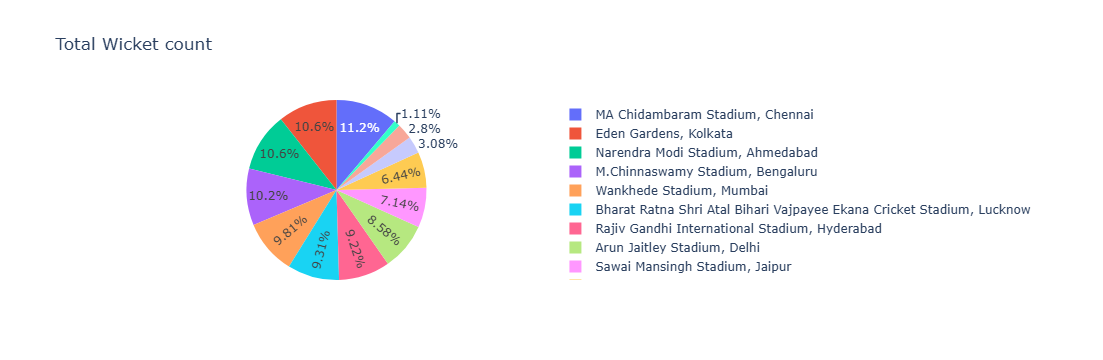

In [211]:
run_by_venue = data.groupby('venue')['total_runs'].sum().sort_values(ascending=False)
fig = go.Figure(data=[go.Pie(
    labels=run_by_venue.index,
    values=run_by_venue.values,
)])
fig.update_layout(
    title_text='Total Wicket count',
)

fig.show()

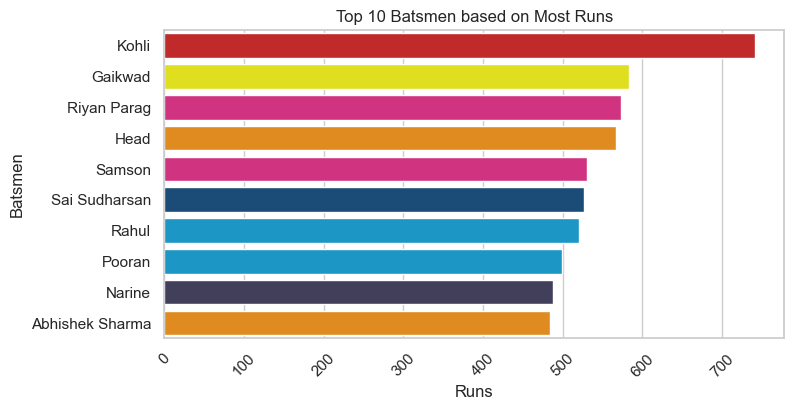

In [212]:
plt.figure(figsize=(8,4))
sns.barplot(data.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False)[:10], orient='h', palette=[jersey_colors[team] for team in data.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False)[:10].index.map(lambda x : data[data['striker']==x]['batting_team'].unique()[0])])
plt.xticks(rotation=45)
plt.xlabel('Runs')
plt.ylabel('Batsmen')
plt.title('Top 10 Batsmen based on Most Runs')
plt.show()

In [213]:
top_10_boundary = data[data['runs_of_bat']==4].groupby('striker')['striker'].count().sort_values(ascending=False).reset_index(name='count')[:10]

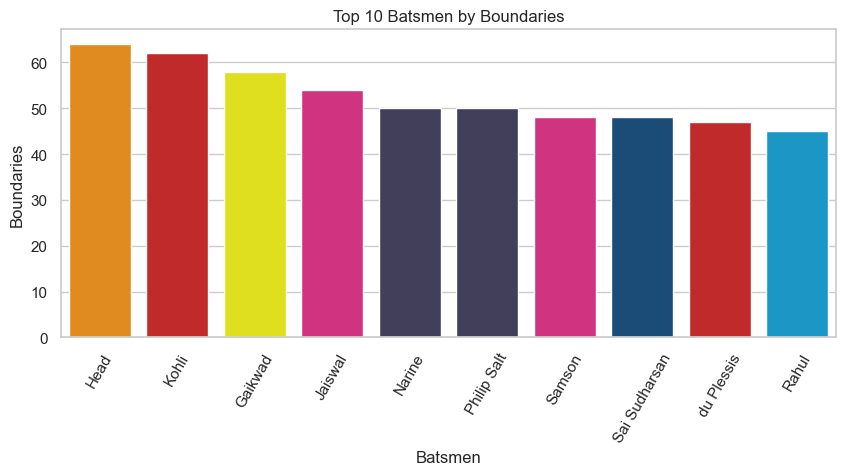

In [214]:
plt.figure(figsize=(10,4))
sns.barplot(data=top_10_boundary, x='striker', y='count', palette = [jersey_colors[team] for team in top_10_boundary['striker'].map(lambda x : data[data['striker']==x]['batting_team'].unique()[0])])
plt.xticks(rotation=60)
plt.title("Top 10 Batsmen by Boundaries")
plt.xlabel('Batsmen')
plt.ylabel('Boundaries')
plt.show()

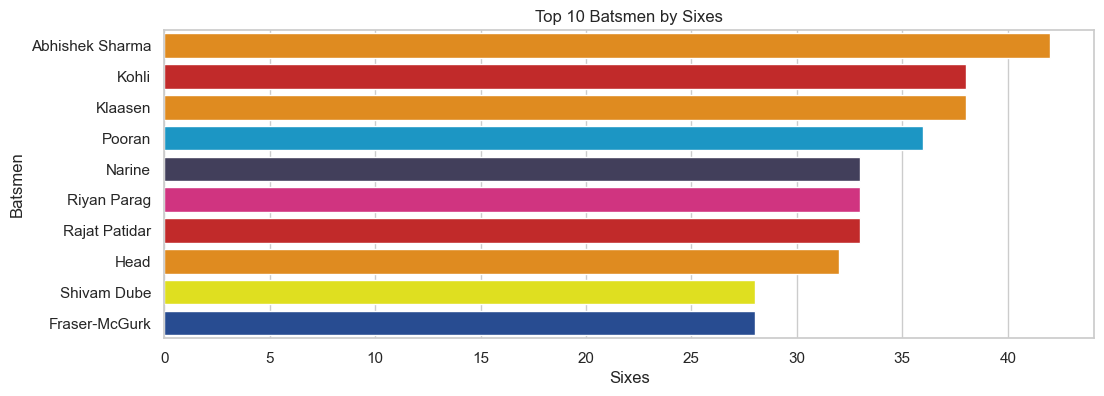

In [215]:
plt.figure(figsize=(12,4))
top_10_six = data[data['runs_of_bat']==6].groupby('striker')['striker'].count().sort_values(ascending=False).reset_index(name='count')[:10]
sns.barplot(data=top_10_six, y='striker', x='count',orient='h', palette = [jersey_colors[team] for team in top_10_six['striker'].map(lambda x : data[data['striker']==x]['batting_team'].unique()[0])])
plt.xticks()
plt.title("Top 10 Batsmen by Sixes")
plt.ylabel('Batsmen')
plt.xlabel('Sixes')
plt.show()

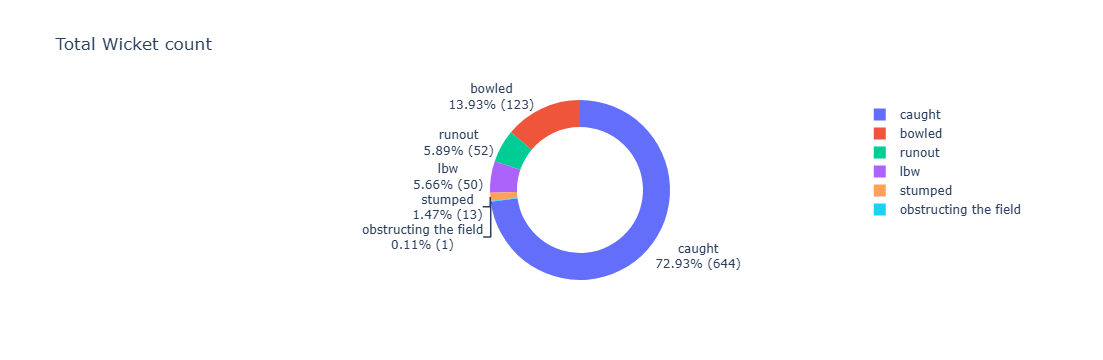

In [216]:
wicket_type = data['wicket_type'].value_counts()
total_wickets = wicket_type.values.sum()
custom_text = [f'{(100 * value / total_wickets):.2f}%\n({value})' for value in wicket_type.values]

fig = go.Figure(data=[go.Pie(
    labels=wicket_type.index,
    values=wicket_type.values,
    hole=.7,
    text=custom_text,
    textinfo='label+text',
)])
fig.update_layout(
    title_text='Total Wicket count',
)

fig.show()

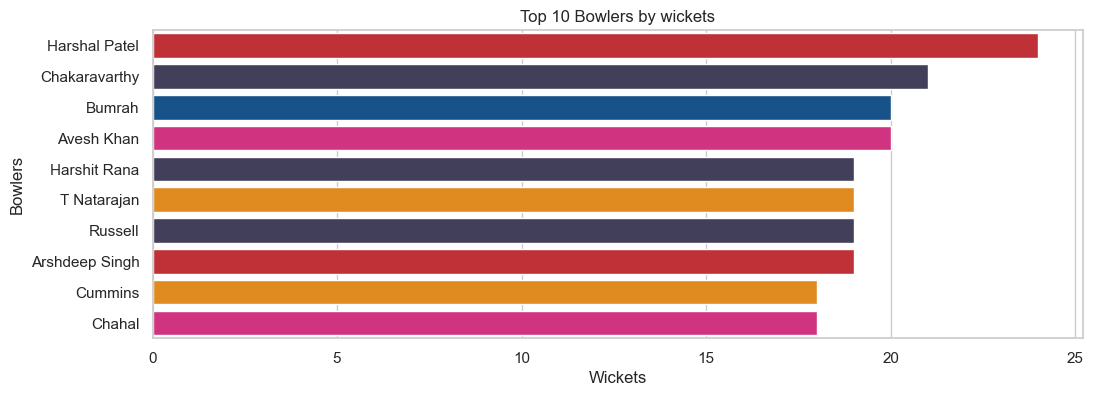

In [217]:
top_10_wicket_bowler = data.groupby('bowler')['wicket_type'].apply(lambda x: (x.dropna() != 'runout').sum()).sort_values(ascending=False)[:10].reset_index(name="count")
plt.figure(figsize=(12,4))
sns.barplot(data=top_10_wicket_bowler, y='bowler', x='count',orient='h', palette = [jersey_colors[team] for team in top_10_wicket_bowler['bowler'].map(lambda x : data[data['bowler']==x]['bowling_team'].unique()[0])])
plt.xticks()
plt.title("Top 10 Bowlers by wickets")
plt.ylabel('Bowlers')
plt.xlabel('Wickets')
plt.show()

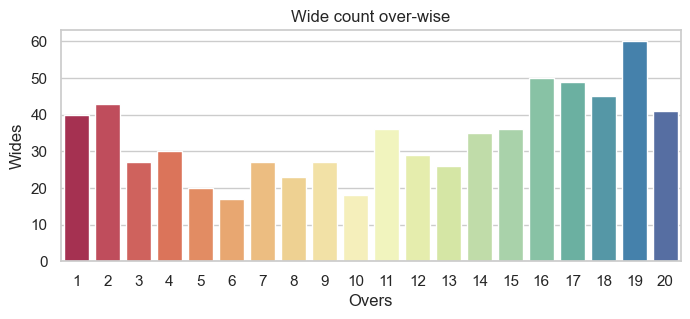

In [218]:
wides_by_over =data.groupby('over_')['wide'].sum()
plt.figure(figsize=(8,3))
sns.barplot(wides_by_over, palette='Spectral')
plt.xlabel('Overs')
plt.ylabel('Wides')
plt.title('Wide count over-wise')
plt.show()


In [219]:
# Wide count is high in death overs

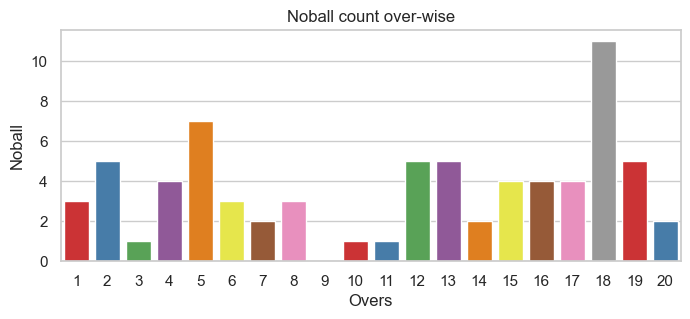

In [220]:
noball_by_over =data.groupby('over_')['noballs'].sum()
plt.figure(figsize=(8,3))
sns.barplot(noball_by_over, palette='Set1')
plt.xlabel('Overs')
plt.ylabel('Noball')
plt.title('Noball count over-wise')
plt.show()


In [221]:
data.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,...,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder,total_runs,over_,phase
0,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,...,1,0,0,0,NaN,NaN,NaN,1,1,powerplay
1,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,...,0,0,0,0,NaN,NaN,NaN,1,1,powerplay
2,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,...,0,0,0,0,NaN,NaN,NaN,0,1,powerplay
3,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,...,0,0,0,0,NaN,NaN,NaN,0,1,powerplay
4,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,...,0,0,0,0,NaN,NaN,NaN,0,1,powerplay


In [222]:
most_catches = data[data['wicket_type']=='caught'].groupby('fielder')['fielder'].count().sort_values(ascending=False).reset_index(name='count')

In [223]:
most_catches['fielder']

0              Rahul
1               Axar
2      Jitesh Sharma
3        Philip Salt
4        Dhruv Jurel
           ...      
168        Moeen Ali
169     Mayank Yadav
170          Maharaj
171      Livingstone
172       Mustafizur
Name: fielder, Length: 173, dtype: object

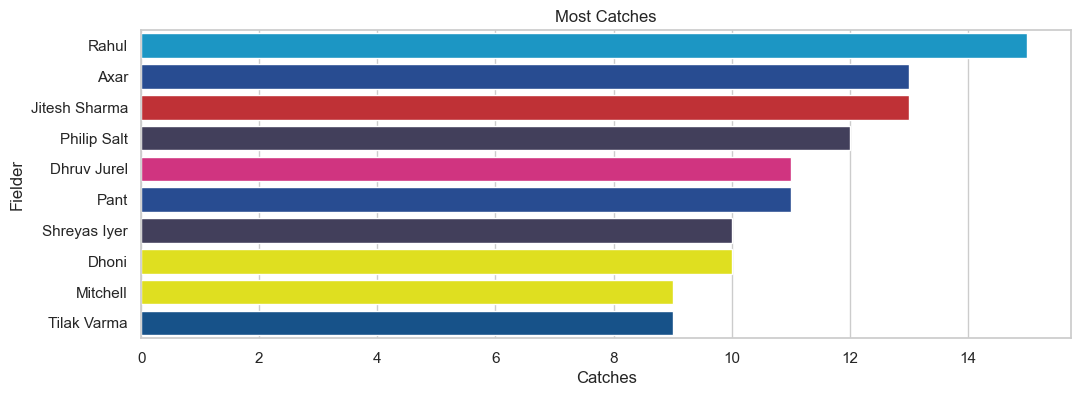

In [224]:
most_catches_10 = data[data['wicket_type']=='caught'].groupby('fielder')['fielder'].count().sort_values(ascending=False).reset_index(name='count')[:10]
plt.figure(figsize=(12,4))
sns.barplot(data=most_catches_10, y='fielder', x='count',orient='h', palette = [jersey_colors[team] for team in most_catches_10['fielder'].map(lambda x : data[data['fielder']==x]['bowling_team'].unique()[0])])
plt.xticks()
plt.title("Most Catches")
plt.ylabel('Fielder')
plt.xlabel('Catches')
plt.show()

# Batting Analysis

In [225]:
player_avg = data.groupby(by=['match_id', 'striker'])[['runs_of_bat', 'player_dismissed']].sum().reset_index()

In [226]:
player_avg

,match_id,striker,runs_of_bat,player_dismissed
0,202401,Anuj Rawat,48,0
1,202401,Gaikwad,15,Gaikwad
2,202401,Green,18,Green
3,202401,Jadeja,25,0
4,202401,Karthik,38,Anuj Rawat
...,...,...,...,...
1110,202474,Shahbaz Ahmed,8,Shahbaz Ahmed
1111,202474,Shreyas Iyer,6,0
1112,202474,Tripathi,9,Tripathi
1113,202474,Unadkat,4,Unadkat


In [227]:
scores = player_avg.groupby('striker')['runs_of_bat'].sum().reset_index(name='total_runs')

In [228]:
dismissal = player_avg[player_avg['player_dismissed']!=0].groupby('player_dismissed')['striker'].count().reset_index(name="count")

In [229]:
scores_dismiss = pd.merge(scores, dismissal, left_on="striker", right_on='player_dismissed', how='left').fillna(0)

In [230]:
scores_dismiss

,striker,total_runs,player_dismissed,count
0,Abdul Samad,182,Abdul Samad,9.0
1,Abhinav Manohar,9,Abhinav Manohar,2.0
2,Abhishek Sharma,484,Abhishek Sharma,15.0
3,Abishek Porel,327,Abishek Porel,9.0
4,Akash Deep,2,0,0.0
...,...,...,...,...
165,Williamson,27,Williamson,2.0
166,Wood,9,0,0.0
167,Yudhvir Singh,21,Yudhvir Singh,2.0
168,de Kock,250,de Kock,11.0


In [231]:
scores_dismiss['Batting_average'] = scores_dismiss.apply(lambda x : x['total_runs']/x['count'] if x['count']!=0 else x['total_runs'], axis=1)

In [232]:
batsmen_avg = scores_dismiss.sort_values(by='Batting_average', ascending=False)[['striker', 'Batting_average']]

In [233]:
top_10_avg = scores_dismiss.sort_values(by='Batting_average', ascending=False)[['striker', 'Batting_average']][:10]

In [234]:
top_10_avg

,striker,Batting_average
151,Tristan Stubbs,63.000000
93,Pooran,62.375000
59,Kohli,61.750000
112,Riyan Parag,57.300000
32,Dhoni,53.666667
37,Gaikwad,53.000000
158,Venkatesh Iyer,52.857143
131,Shashank Singh,50.571429
121,Samson,48.272727
118,Sai Sudharsan,47.909091


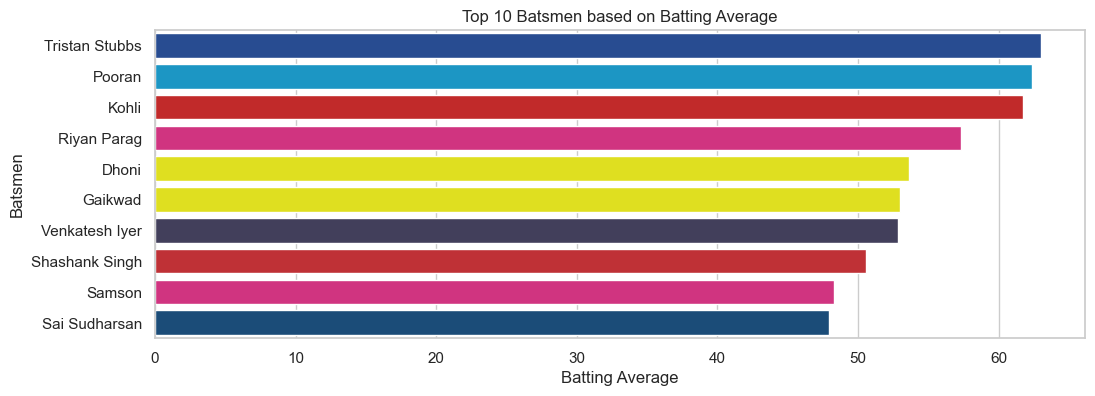

In [235]:
plt.figure(figsize=(12,4))
sns.barplot(data=top_10_avg, y='striker', x='Batting_average', orient='h',  palette = [jersey_colors[team] for team in top_10_avg['striker'].map(lambda x : data[data['striker']==x]['batting_team'].unique()[0])])
plt.xlabel('Batting Average')
plt.ylabel('Batsmen')
plt.title('Top 10 Batsmen based on Batting Average')
plt.show()

In [236]:
def batsmen_stats(name):
    data_temp = data[data['striker']==name]
    print(f'Player: {name}')
    print(f"Runs Scored:{data_temp['runs_of_bat'].sum()} ")
    print(f"Batting Average: {batsmen_avg[batsmen_avg['striker']==name]['Batting_average'].values[0]:.2f}")
    print(f"No of times dismissed: {dismissal[dismissal['player_dismissed']==name]['count'].values[0]}")
    print(f"Dismissal Type: {dict(data_temp['wicket_type'].value_counts())}")
    print(f"No of Boundaries: {data_temp[data_temp['runs_of_bat']==4].shape[0]}")
    print(f"No of Sixes: {data_temp[data_temp['runs_of_bat']==6].shape[0]}")
    print(f"Highest Score: {data_temp.groupby('match_no')['runs_of_bat'].sum().max()}")
    print(f"Half Centuries: {data_temp.groupby('match_no')['runs_of_bat'].sum().map(lambda x : True if x>=50 and x<100 else False).sum()}")
    print(f"Centuries: {data_temp.groupby('match_no')['runs_of_bat'].sum().map(lambda x : True if x>100 else False).sum()}")
    plt.figure(figsize=(16,4))
    over_runs = data_temp.groupby('over')['runs_of_bat'].sum()
    dismissal_overs = data_temp[data_temp.player_dismissed==data_temp.striker].over
    sns.lineplot(data_temp.groupby('over')['runs_of_bat'].sum(), c='r')
    plt.xlim(0, 20)
    plt.xticks(ticks = np.arange(0,21), labels=np.arange(0,21))
    plt.grid()
    plt.ylabel("Total Runs Scored")
    plt.title("Total Runs Scored / Dismissal in each over")
    plt.scatter(dismissal_overs, over_runs[dismissal_overs], label='Dismissal', c='b', marker='o')
    plt.legend()
    plt.show()


# Top Batsmen Analysis

Player: Dhoni
Runs Scored:161 
Batting Average: 53.67
No of times dismissed: 3
Dismissal Type: {'runout': 1, 'bowled': 1, 'caught': 1}
No of Boundaries: 14
No of Sixes: 13
Highest Score: 37
Half Centuries: 0
Centuries: 0


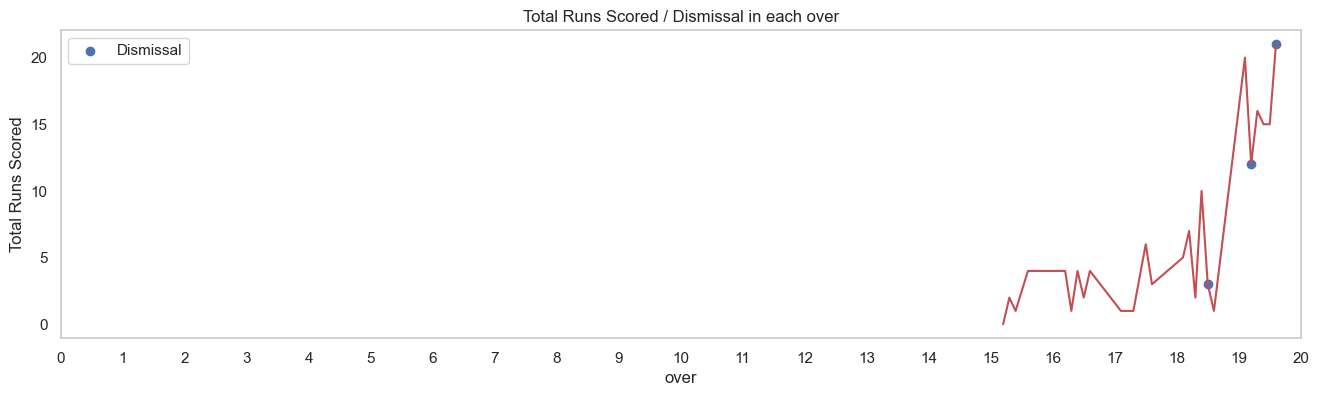

In [237]:
batsmen_stats('Dhoni')

Player: Kohli
Runs Scored:741 
Batting Average: 61.75
No of times dismissed: 12
Dismissal Type: {'caught': 11, 'runout': 1, 'bowled': 1}
No of Boundaries: 62
No of Sixes: 38
Highest Score: 113
Half Centuries: 5
Centuries: 1


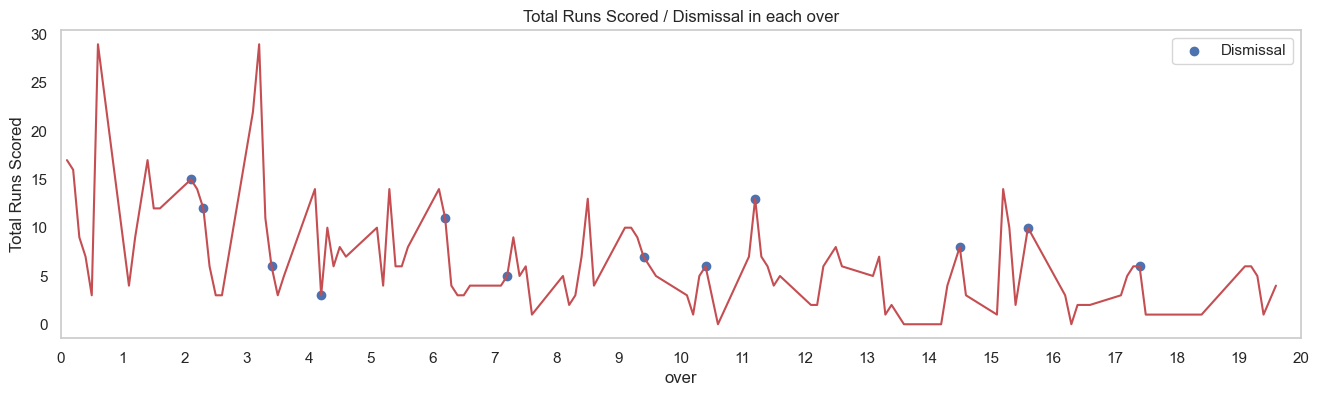

In [238]:
batsmen_stats('Kohli')

Player: Rohit
Runs Scored:417 
Batting Average: 32.08
No of times dismissed: 13
Dismissal Type: {'caught': 11, 'lbw': 1, 'bowled': 1}
No of Boundaries: 45
No of Sixes: 23
Highest Score: 105
Half Centuries: 1
Centuries: 1


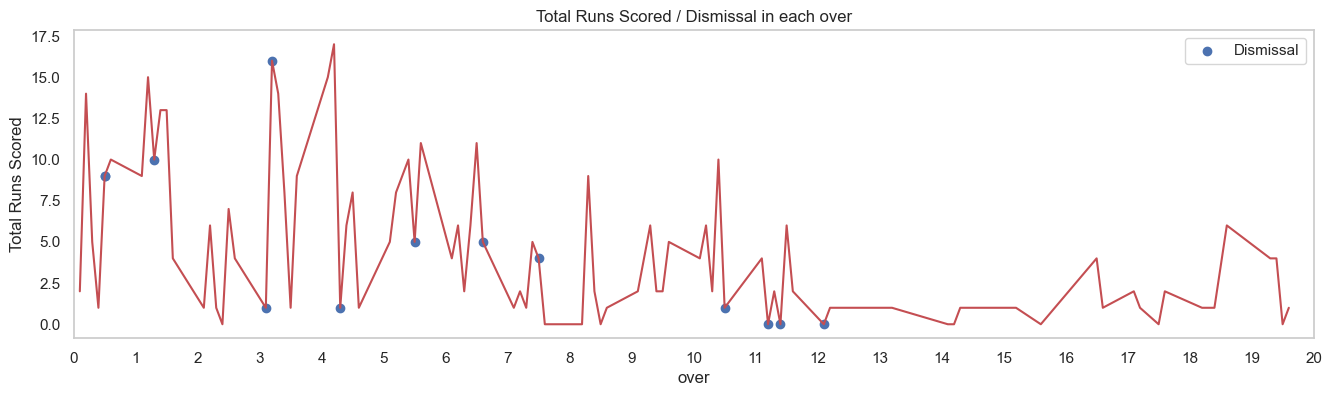

In [239]:
batsmen_stats('Rohit')

Player: Jadeja
Runs Scored:267 
Batting Average: 44.50
No of times dismissed: 6
Dismissal Type: {'caught': 3, 'runout': 1, 'lbw': 1, 'obstructing the field': 1}
No of Boundaries: 22
No of Sixes: 8
Highest Score: 57
Half Centuries: 1
Centuries: 0


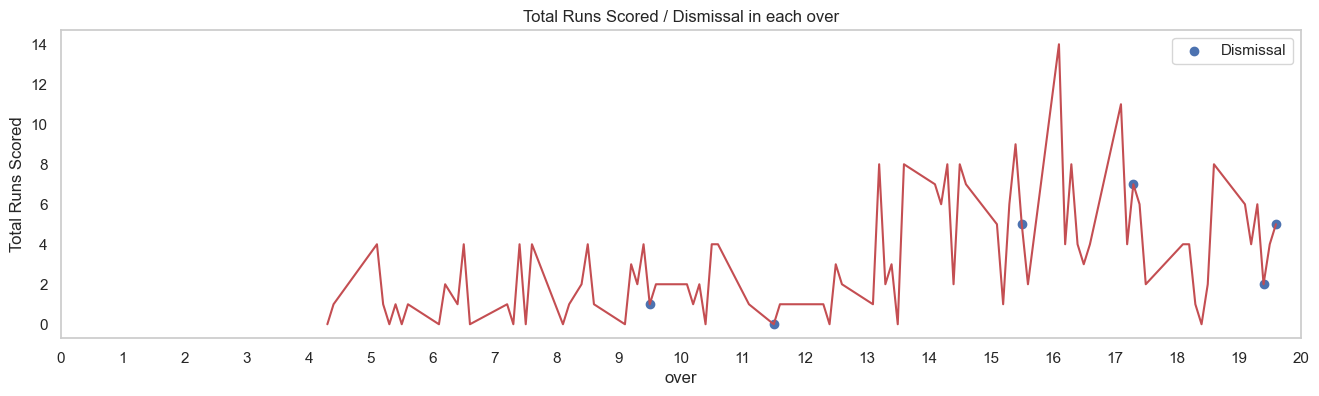

In [240]:
batsmen_stats('Jadeja')

Player: Gaikwad
Runs Scored:583 
Batting Average: 53.00
No of times dismissed: 11
Dismissal Type: {'caught': 10, 'bowled': 1}
No of Boundaries: 58
No of Sixes: 18
Highest Score: 108
Half Centuries: 4
Centuries: 1


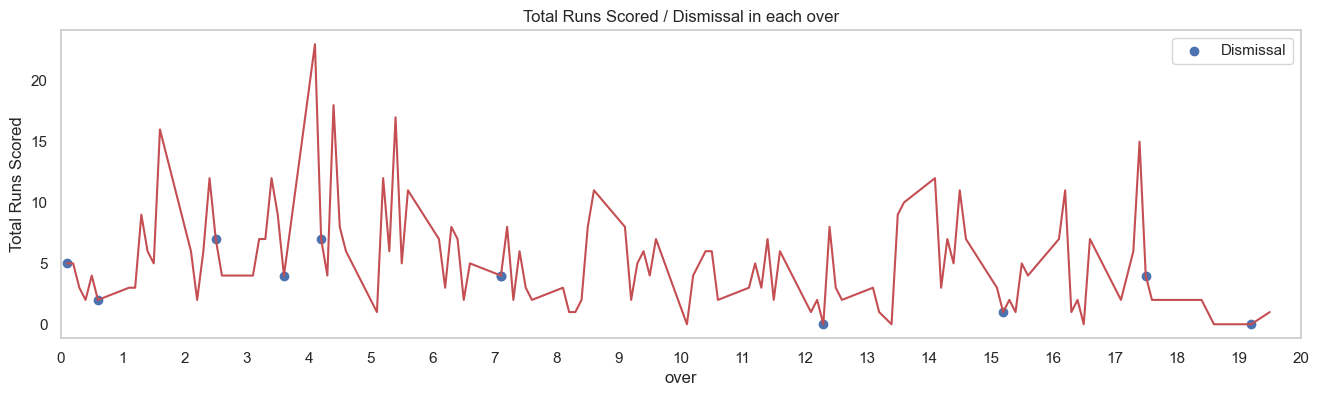

In [241]:
batsmen_stats('Gaikwad')

Player: Anuj Rawat
Runs Scored:98 
Batting Average: 24.50
No of times dismissed: 4
Dismissal Type: {'caught': 2, 'lbw': 1}
No of Boundaries: 10
No of Sixes: 3
Highest Score: 48
Half Centuries: 0
Centuries: 0


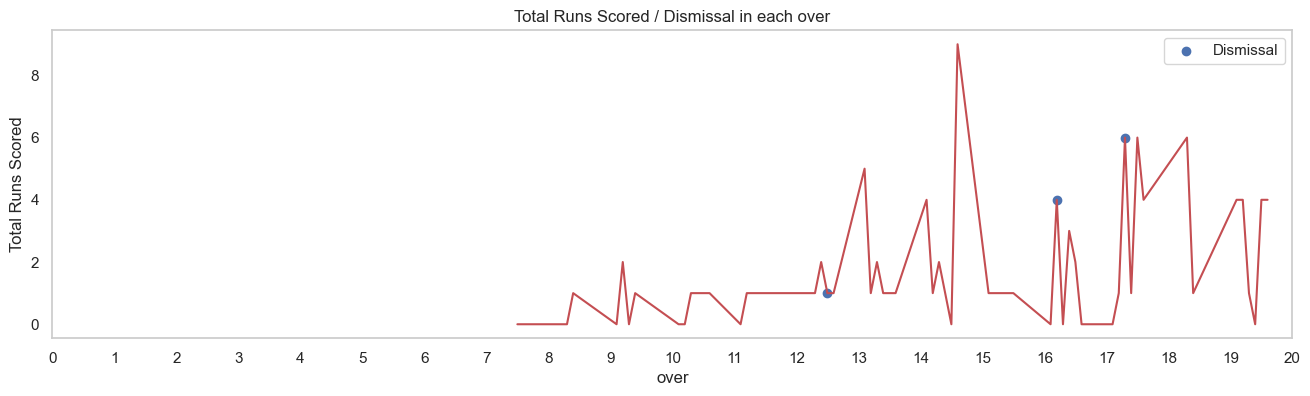

In [242]:
batsmen_stats('Anuj Rawat')

Player: Will Jacks
Runs Scored:230 
Batting Average: 38.33
No of times dismissed: 6
Dismissal Type: {'caught': 5, 'bowled': 1}
No of Boundaries: 16
No of Sixes: 18
Highest Score: 100
Half Centuries: 1
Centuries: 0


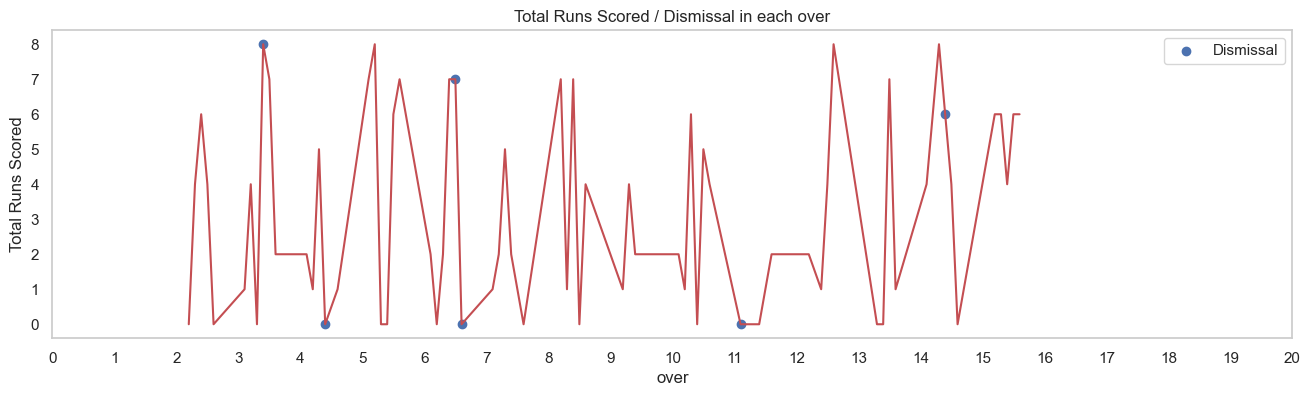

In [243]:
batsmen_stats('Will Jacks')

Player: Head
Runs Scored:567 
Batting Average: 40.50
No of times dismissed: 14
Dismissal Type: {'caught': 10, 'bowled': 4}
No of Boundaries: 64
No of Sixes: 32
Highest Score: 102
Half Centuries: 4
Centuries: 1


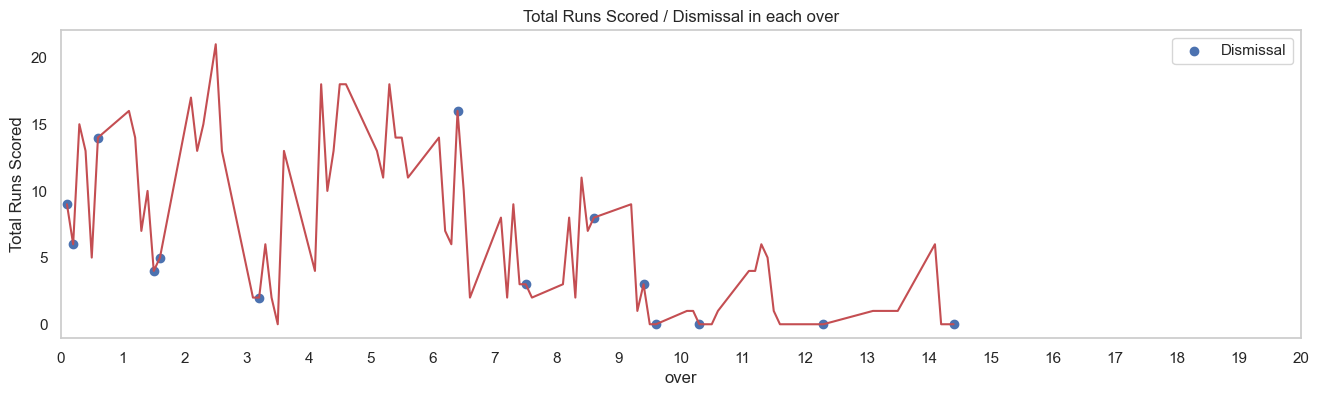

In [244]:
batsmen_stats('Head')

Player: Abhishek Sharma
Runs Scored:484 
Batting Average: 32.27
No of times dismissed: 15
Dismissal Type: {'caught': 14, 'bowled': 1}
No of Boundaries: 36
No of Sixes: 42
Highest Score: 75
Half Centuries: 3
Centuries: 0


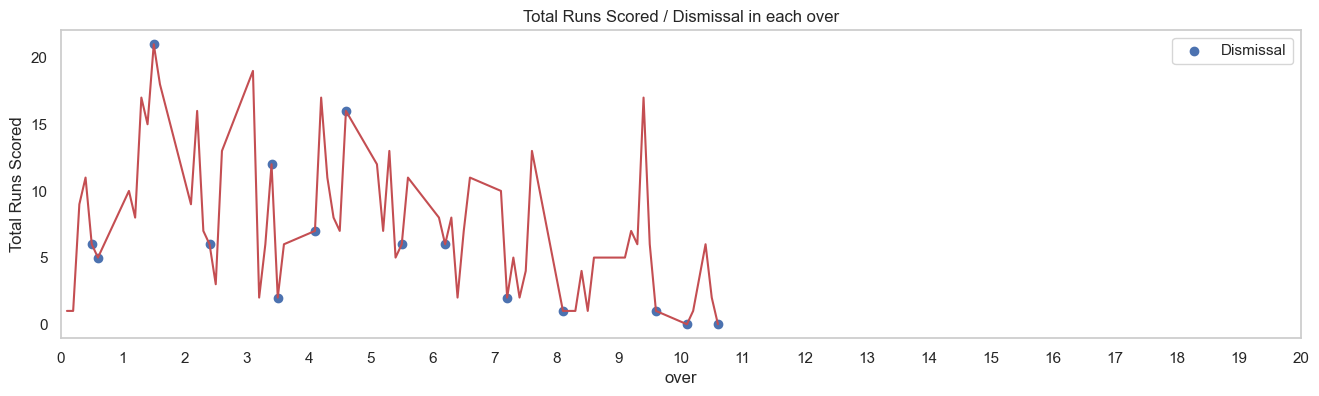

In [245]:
batsmen_stats('Abhishek Sharma')

Player: Klaasen
Runs Scored:479 
Batting Average: 39.92
No of times dismissed: 12
Dismissal Type: {'caught': 6, 'bowled': 6}
No of Boundaries: 19
No of Sixes: 38
Highest Score: 80
Half Centuries: 4
Centuries: 0


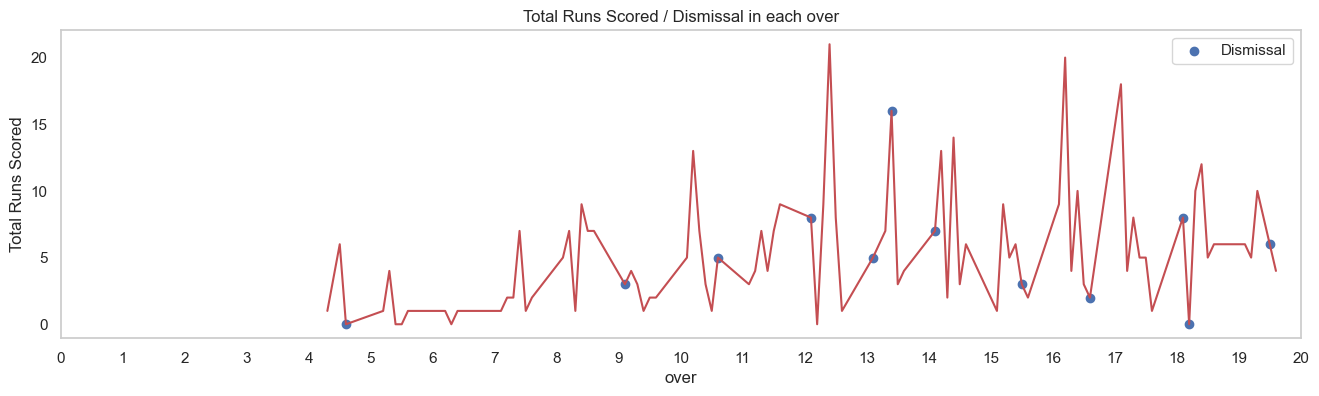

In [246]:
batsmen_stats('Klaasen')

Player: Narine
Runs Scored:488 
Batting Average: 37.54
No of times dismissed: 13
Dismissal Type: {'caught': 9, 'bowled': 4}
No of Boundaries: 50
No of Sixes: 33
Highest Score: 109
Half Centuries: 3
Centuries: 1


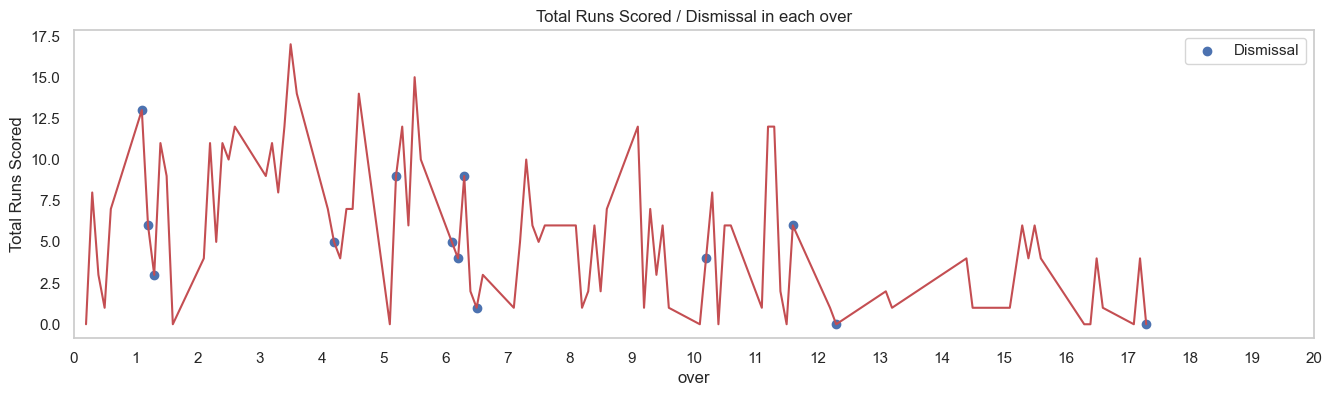

In [247]:
batsmen_stats('Narine')

# Bowling Analysis

In [248]:
def bowler_stats(name):
    data_temp = data[data['bowler']==name]
    print(f'Player: {name}')
    wicket_count = data_temp.groupby('bowler')['wicket_type'].apply(lambda x: (x.dropna() != 'runout').sum()).sort_values(ascending=False).sum()
    runs_conceded = data_temp.groupby('bowler')['total_runs'].sum().values[0]
    print(f"Wickets: {wicket_count}")
    wik = data[data['bowler']==name].groupby('match_no')['wicket_type'].count().values
    run = data[data['bowler']==name].groupby('match_no')['runs_of_bat'].sum().values
    bowling_list = list(zip(wik, run))

    sorted_bowling_list = sorted(bowling_list, key=lambda x: (-x[0], x[1]))

    best_bowling_figure = sorted_bowling_list[0]



    print(f"Best Figures: {best_bowling_figure[1]}/{best_bowling_figure[0]}")
    print(f"Bowling Average: {runs_conceded/wicket_count:.2f}")
    print(f"Wicket Type: {dict(data_temp['wicket_type'].value_counts())}")
    print(f"No of Wides: {data_temp.groupby('bowler')['wide'].sum().values[0]}")
    print(f"No of No Balls: {data_temp.groupby('bowler')['noballs'].sum().values[0]}")
    print(f"No of Boundaries conceded: {data_temp[data_temp['runs_of_bat']==4].shape[0]}")
    print(f"No of Sixes conceded: {data_temp[data_temp['runs_of_bat']==6].shape[0]}")


    plt.figure(figsize=(16,4))
    over_runs = data_temp.groupby('over')['runs_of_bat'].sum()
    dismissal_overs = data_temp[data_temp.player_dismissed==data_temp.striker].over
    rpo = data_temp.groupby('over')['runs_of_bat'].sum().reset_index()
    sns.lineplot(data=rpo, x='over', y='runs_of_bat', color='blue')
    plt.xlim(0, 20)
    plt.xticks(ticks = np.arange(0,21), labels=np.arange(0,21))
    plt.title('Total Runs/wickets Conceded in each over')
    plt.grid()
    plt.ylabel("Total Runs Conceded")
    plt.scatter(dismissal_overs, over_runs[dismissal_overs], label='Wickets', c='r')
    plt.legend()
    plt.show()


Player: Bumrah
Wickets: 20
Best Figures: 21/5
Bowling Average: 17.05
Wicket Type: {'caught': 13, 'bowled': 6, 'lbw': 1, 'runout': 1}
No of Wides: 13
No of No Balls: 4
No of Boundaries conceded: 29
No of Sixes conceded: 10


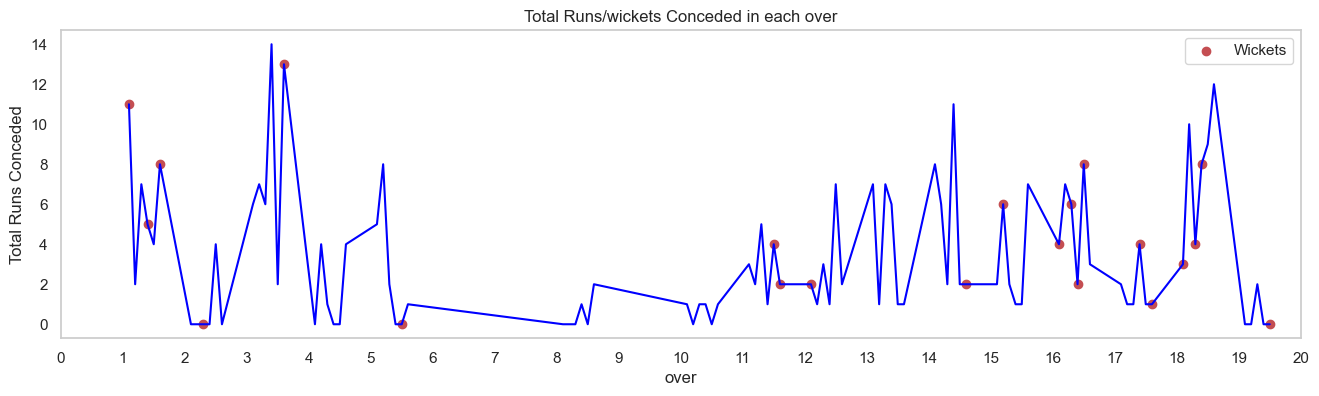

In [249]:
bowler_stats('Bumrah')

Player: Narine
Wickets: 17
Best Figures: 21/2
Bowling Average: 22.12
Wicket Type: {'caught': 10, 'bowled': 4, 'lbw': 3, 'runout': 1}
No of Wides: 4
No of No Balls: 0
No of Boundaries conceded: 17
No of Sixes conceded: 17


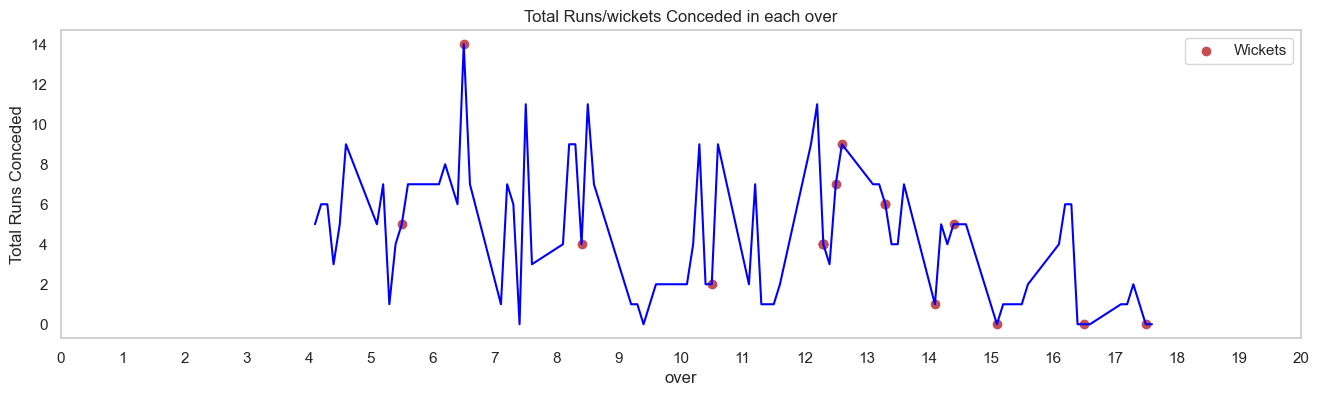

In [250]:
bowler_stats('Narine')

Player: Pathirana
Wickets: 13
Best Figures: 26/4
Bowling Average: 13.38
Wicket Type: {'caught': 8, 'bowled': 5}
No of Wides: 12
No of No Balls: 0
No of Boundaries conceded: 14
No of Sixes conceded: 5


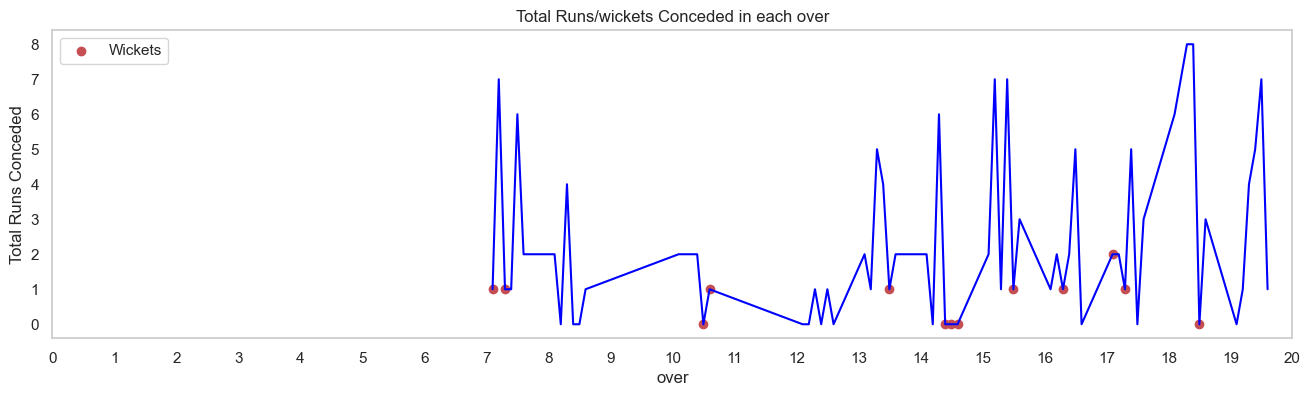

In [251]:
bowler_stats('Pathirana')

Player: Starc
Wickets: 17
Best Figures: 30/4
Bowling Average: 26.47
Wicket Type: {'caught': 10, 'bowled': 7, 'runout': 3}
No of Wides: 16
No of No Balls: 0
No of Boundaries conceded: 47
No of Sixes conceded: 23


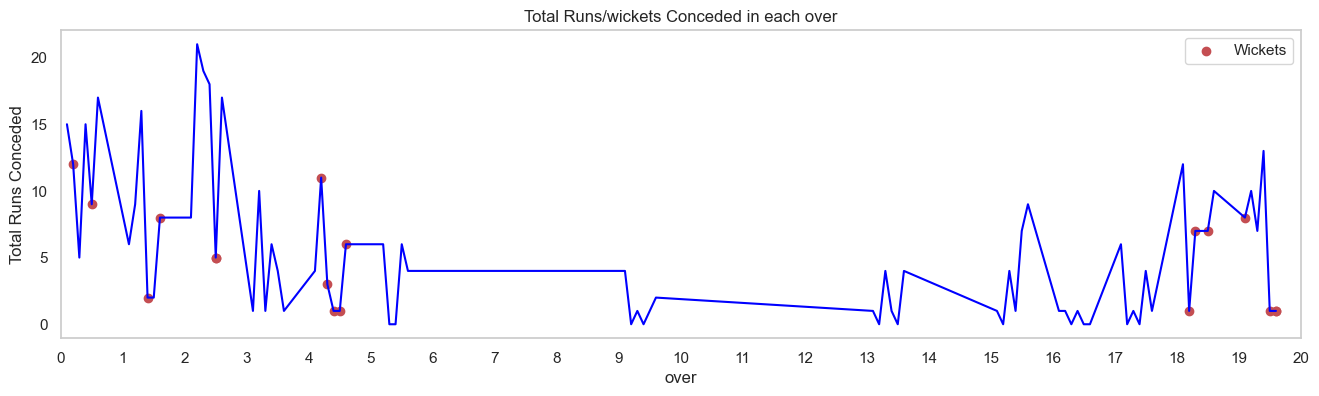

In [252]:
bowler_stats('Starc')

Player: Harshal Patel
Wickets: 24
Best Figures: 29/4
Bowling Average: 20.17
Wicket Type: {'caught': 18, 'runout': 6, 'bowled': 4, 'lbw': 2}
No of Wides: 20
No of No Balls: 2
No of Boundaries conceded: 41
No of Sixes conceded: 18


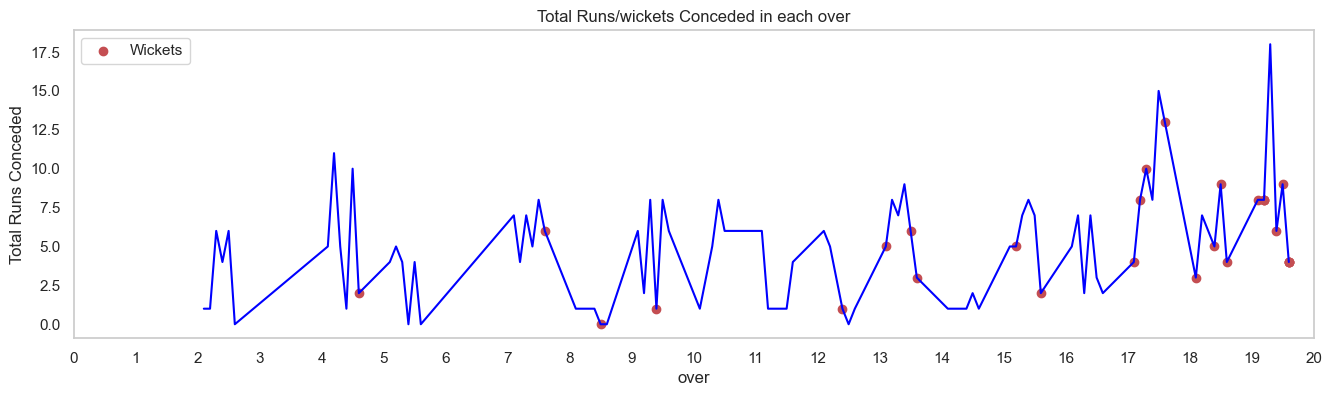

In [253]:
bowler_stats('Harshal Patel')

Player: T Natarajan
Wickets: 19
Best Figures: 18/4
Bowling Average: 24.58
Wicket Type: {'caught': 15, 'bowled': 3, 'lbw': 1, 'runout': 1}
No of Wides: 22
No of No Balls: 0
No of Boundaries conceded: 47
No of Sixes conceded: 17


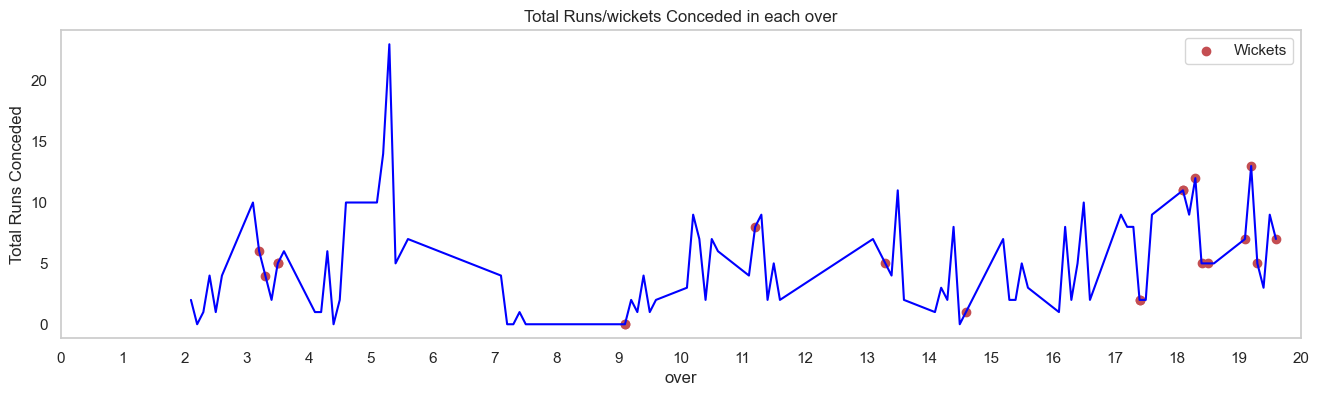

In [254]:
bowler_stats('T Natarajan')

Player: Chahal
Wickets: 18
Best Figures: 11/3
Bowling Average: 30.44
Wicket Type: {'caught': 14, 'lbw': 2, 'bowled': 1, 'stumped': 1, 'runout': 1}
No of Wides: 13
No of No Balls: 1
No of Boundaries conceded: 35
No of Sixes conceded: 30


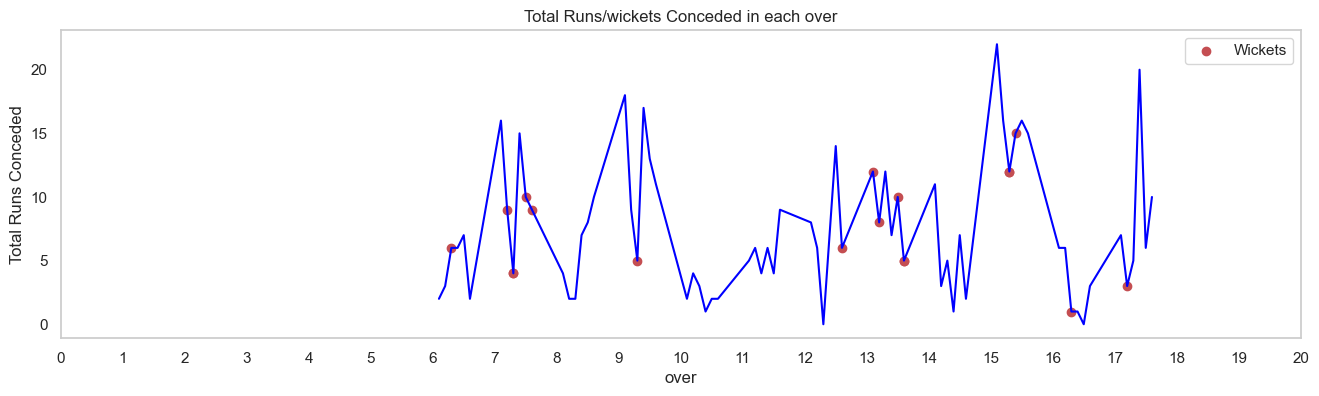

In [255]:
bowler_stats('Chahal')

# Statistical Analysis

In [256]:
data[data.columns[4:]].describe()

,innings,over,runs_of_bat,extras,wide,legbyes,byes,noballs,total_runs,over_
count,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,1.480033,9.570474,1.445904,0.074122,0.039817,0.012842,0.002463,0.004222,1.520026,10.221955
std,0.499616,5.674610,1.800340,0.357906,0.195535,0.112597,0.049568,0.064843,1.780409,5.673515
min,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,9.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000
75%,2.000000,14.400000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.000000
max,2.000000,19.600000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,7.000000,20.000000


In [257]:
match_details = data.groupby(by=['match_no', 'batting_team', 'bowling_team'])[['total_runs', 'wicket_type', 'extras']].agg({"total_runs":"sum", "wicket_type":"count", 'extras':'sum'}).reset_index()

In [258]:
match_details.rename(columns={'wicket_type':'wickets_taken'}, inplace=True)

In [259]:
match_details

,match_no,batting_team,bowling_team,total_runs,wickets_taken,extras
0,1,CSK,RCB,176,4,16
1,1,RCB,CSK,173,6,13
2,2,DC,PBKS,174,9,10
3,2,PBKS,DC,175,6,6
4,3,KKR,SRH,207,7,7
...,...,...,...,...,...,...
137,72,RR,RCB,173,6,5
138,73,RR,SRH,139,7,5
139,73,SRH,RR,175,9,8
140,74,KKR,SRH,114,2,11


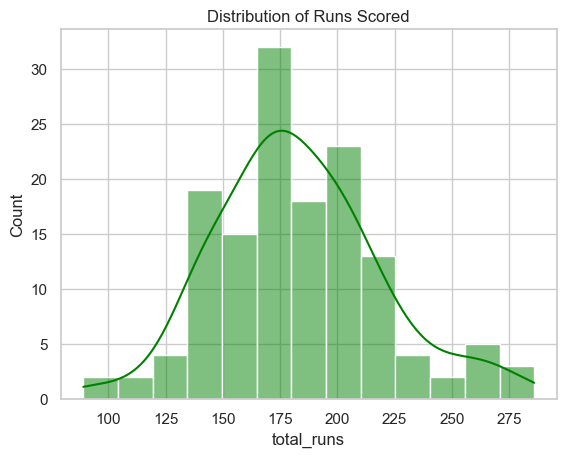

In [260]:
plt.title('Distribution of Runs Scored')
sns.histplot(match_details['total_runs'], kde=True, color='green')
plt.show()

In [261]:
# 182 is the average runs scored in IPL 2024

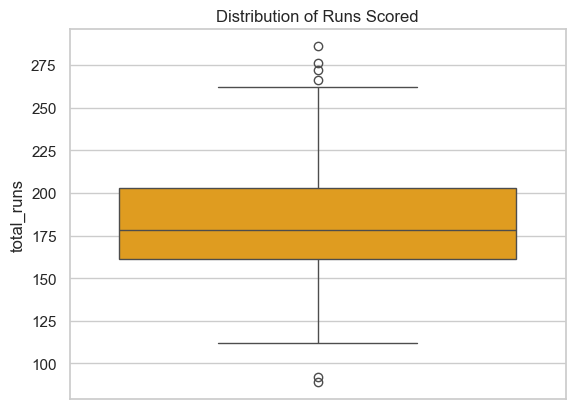

In [262]:
plt.title('Distribution of Runs Scored')
sns.boxplot(match_details['total_runs'], color='orange')
plt.show()

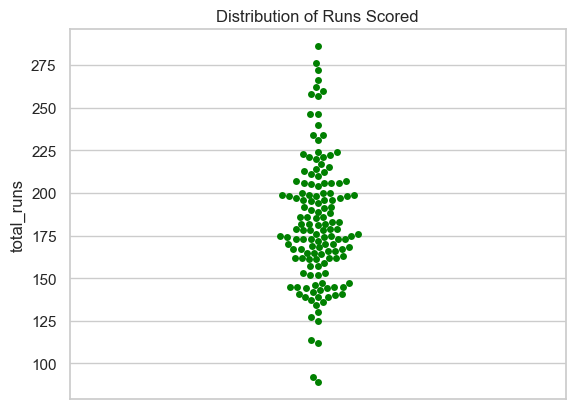

In [263]:
plt.title('Distribution of Runs Scored')
sns.swarmplot(match_details['total_runs'], color='green')
plt.show()

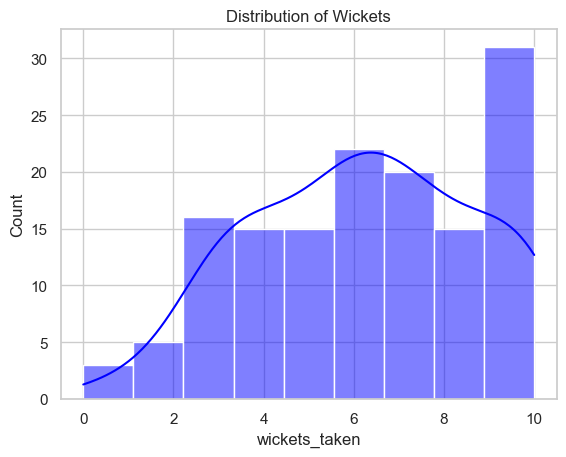

In [264]:
plt.title('Distribution of Wickets')
sns.histplot(match_details['wickets_taken'], kde=True, color='blue')
plt.show()

In [265]:
# 6 wickets is the average wickets taken in IPL 2024

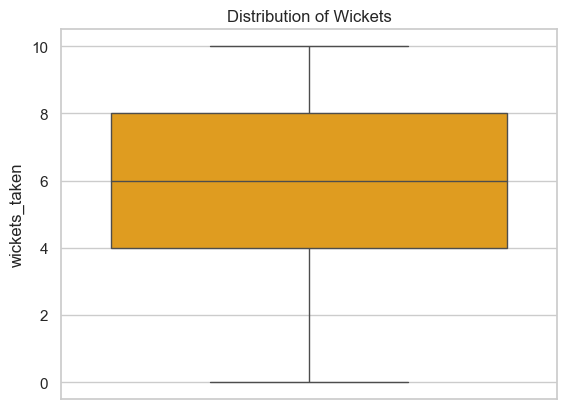

In [266]:
plt.title('Distribution of Wickets')
sns.boxplot(match_details['wickets_taken'], color='orange')
plt.show()

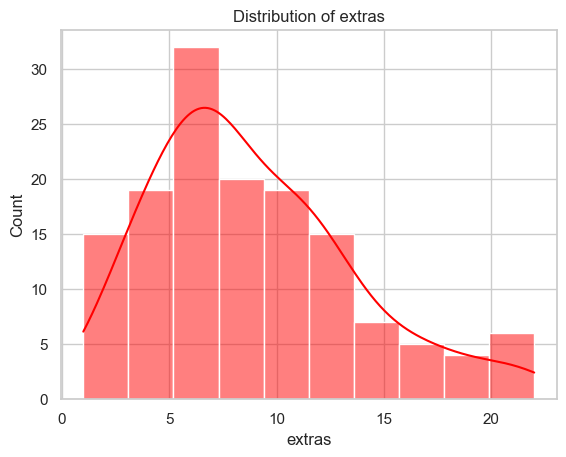

In [267]:
plt.title('Distribution of extras')
sns.histplot(match_details['extras'], kde=True, color='red')
plt.show()

In [268]:
# 8 runs is average extras

In [269]:
from scipy.stats import probplot

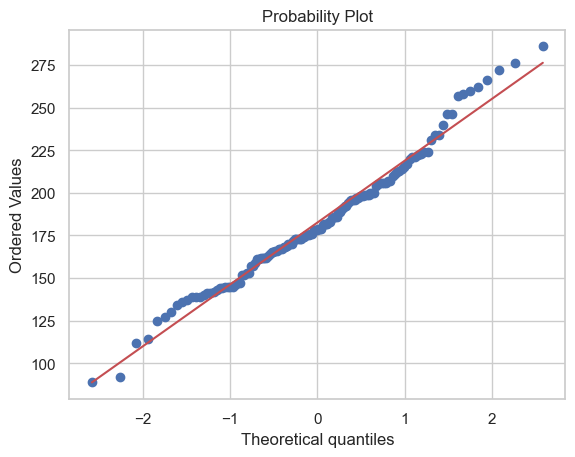

In [270]:
fig, ax = plt.subplots()
probplot(match_details['total_runs'], plot=ax)
plt.show()

In [271]:
# Total runs scored follows Normal Linear Distribution with deviations on both ends, similar to the mean heavier tails as seen on the kde plot